# **Proyecto Integrador**

**Maestría en Inteligencia Artificial Aplicada**
**Avance 1. Análisis exploratorio de datos**
**Tecnológico de Monterrey**
**Asesor: Dr.Luis Eduardo Falcón Morales**

# Equipo:
- Rodrigo Rodríguez Rodríguez – A01183284
- Rigoberto Vega Escudero – A01793132
- Valeria Alejandra Ramírez Herrera – A01240716

Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes.

Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

- ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
- ¿Cuáles son las estadísticas resumidas del conjunto de datos?
- ¿Hay valores atípicos en el conjunto de datos?
- ¿Cuál es la cardinalidad de las variables categóricas?
- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Se deberían normalizar las imágenes para visualizarlas mejor?
- ¿Hay desequilibrio en las clases de la variable objetivo?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression

## **Base de Datos de las carreras de los tutores**

¿Cuáles son las estadísticas resumidas del conjunto de datos?

Al revisar el Dataset podemos denotar que son datos en su mayoria categoricos, por ende las estadisticas descriptivas son muy concluyentes

In [2]:
#DIR = "Base de datos de tutores - Orlana/"
#os.chdir(DIR)

misdatosCarrera = pd.read_excel("Carreras de Tutores JAN23.xlsx")
misdatosCarrera.describe()

Cuenta Correo Alumno Desc Programa Academico
count                   967                     967
unique                  432                      62
top        A01252030@tec.mx    Prepa Tec Bicultural
freq                      5                     131

In [3]:
misdatosCarrera

Cuenta Correo Alumno                            Desc Programa Academico
0     A00227254@itesm.mx                               Prepa Tec Bicultural
1       A00227254@tec.mx        Licenciado en Contadur’a Pśblica y Finanzas
2       A00227254@tec.mx                             Negocios / Exploraci—n
3       A00227254@tec.mx                               Prepa Tec Bicultural
4       A00227475@tec.mx  Ingenier’a - Bioingenier’a y Procesos Qu’micos...
..                   ...                                                ...
962   A01336489@itesm.mx                              Preparatoria Bilingźe
963     A01336489@tec.mx  Ingenier’a - Innovaci—n y Transformaci—n (aven...
964     A01336489@tec.mx           Ingeniero en Tecnolog’as Computacionales
965   A01339337@itesm.mx                    Ingeniero Mec‡nico Electricista
966     A01339337@tec.mx                    Ingeniero Mec‡nico Electricista

[967 rows x 2 columns]

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 

No se detectaron


In [4]:
# Contar NaN y 0
nan_count = misdatosCarrera.isna().sum()
zero_count = misdatosCarrera.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 Cuenta Correo Alumno       0
Desc Programa Academico    0
dtype: int64

Conteo de 0 por columna:
 Cuenta Correo Alumno       0
Desc Programa Academico    0
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 0


¿Hay valores atípicos en el conjunto de datos?

Segun lo visto en las graficas de este DS, al ser variables categoricas los valores atipicos no pueden ser concluyentes

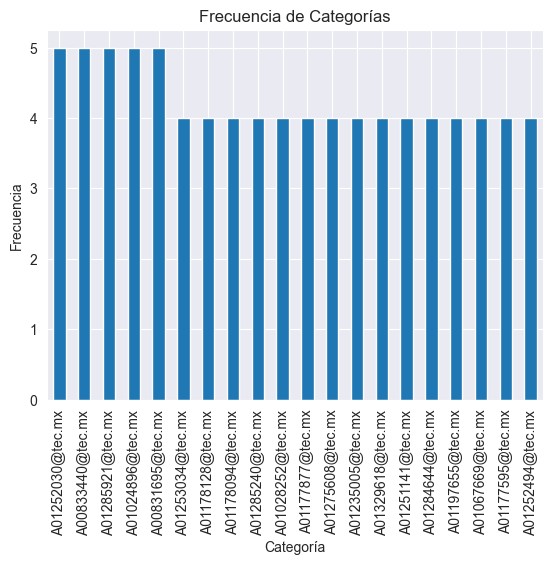

In [5]:
conteo_Personas = misdatosCarrera['Cuenta Correo Alumno'].value_counts().head(20)

conteo_Personas.plot(kind='bar')
plt.title('Frecuencia de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

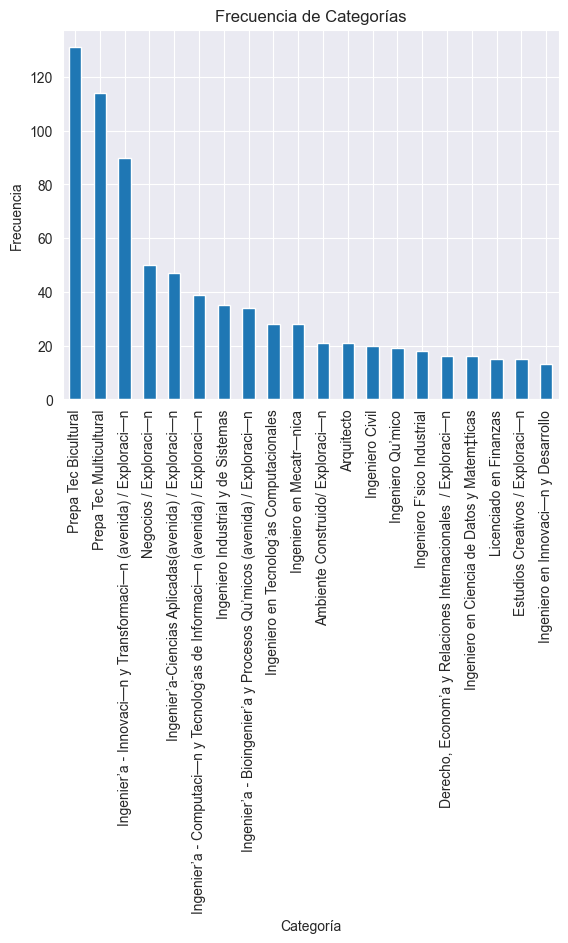

In [6]:
conteo_categorias = misdatosCarrera['Desc Programa Academico'].value_counts().head(20)
conteo_categorias.plot(kind='bar')
plt.title('Frecuencia de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

- Cuenta Correo Alumno: Esta variable tiene una cardinalidad de 432. Esto significa que hay 432 valores únicos de correos electrónicos de alumnos en tu conjunto de datos. Este es un número relativamente alto, lo que sugiere que cada correo electrónico es probablemente único para cada alumno. En el análisis de datos, este tipo de variable a menudo se trata como un identificador único.

- Desc Programa Académico: Esta variable tiene una cardinalidad de 62. Indica que hay 62 programas académicos únicos descritos en tu conjunto de datos. Esta es una cardinalidad más moderada, y esta variable es claramente categórica, posiblemente adecuada para análisis que requieren la agrupación o comparación de datos por programa académico.

Otras Conclusiones:
- Cuenta Correo Alumno: Dado que es probable que sea un identificador único para cada estudiante, puede no ser útil para análisis estadísticos o de agrupación, a menos que estemos buscando información específica del estudiante. Sin embargo, es valiosa para operaciones de identificación o seguimiento individual.

- Desc Programa Académico: Esta variable es más adecuada para análisis comparativos o de agrupación. Por ejemplo, podemos analizar cómo los estudiantes de diferentes programas académicos difieren en varios aspectos como rendimiento, elección de cursos, etc.

In [7]:
import pandas as pd

# Supongamos que df es tu DataFrame
# df = pd.DataFrame(...)

# Filtrar solo las columnas categóricas
columnas_categoricas = misdatosCarrera.select_dtypes(include=['object', 'category']).columns

# Calcular la cardinalidad
cardinalidad = misdatosCarrera[columnas_categoricas].nunique()

# Mostrar la cardinalidad de cada columna categórica
print(cardinalidad)

Cuenta Correo Alumno       432
Desc Programa Academico     62
dtype: int64


Para estas preguntas concluimos que el primer Dataset no es lo suficiente mente robusto para tratar de responderlas.

- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Se deberían normalizar las imágenes para visualizarlas mejor?
- ¿Hay desequilibrio en las clases de la variable objetivo?

# Conjunto de evaluaciones por tutor

In [8]:
misdatosEvaluaciones = pd.read_excel("Evaluaciones por tutoría brindadas por los alumnos 23JAN.xlsx")
misdatosEvaluaciones.describe()

IDAppointment        Status     Evaluator  EvaluatorUserType  \
count   11463.000000  11463.000000  11463.000000       11463.000000   
mean     7788.061502      4.025735  14797.578906           3.228213   
std       713.711349      0.839991   2162.524376           3.087241   
min      6289.000000    -10.000000  11762.000000           1.000000   
25%      7259.000000      4.000000  13936.000000           1.000000   
50%      7751.000000      4.000000  14433.000000           1.000000   
75%      8360.000000      4.000000  15101.000000           8.000000   
max      9456.000000      5.000000  23513.000000           9.000000   

          Evaluated  evaluatedUsertype  QuestionType  
count  11463.000000       11463.000000  11463.000000  
mean   15161.823345           4.303324      1.616854  
std     2284.171680           3.247274      0.801174  
min    10075.000000           1.000000      1.000000  
25%    13957.000000           1.000000      1.000000  
50%    14584.000000           3.000000      1.000000  
75%    15484.000000           8.000000      2.000000  
max    22382.000000           9.000000      3.000000

In [9]:
misdatosEvaluaciones

IDAppointment  Status  Evaluator               Evaluatorname  \
0               8361       4      19447  gabyfernandez854@gmail.com   
1               8504       4      19883            a01753728@tec.mx   
2               7754       4      15401            A01385134@tec.mx   
3               7107       4      11818            a01654087@tec.mx   
4               8609       4      14524            a01799906@tec.mx   
...              ...     ...        ...                         ...   
11458           8412       4      14278           bayrebe@gmail.com   
11459           7345       4      14172            a01661437@tec.mx   
11460           7365       4      14640            a00835803@tec.mx   
11461           8772       4      19469  juliocesar.2002@icloud.com   
11462           6459       5      12110        cindygfc01@gmail.com   

       EvaluatorUserType  Evaluated                 evaluatedname  \
0                      8      14566              a01178149@tec.mx   
1                      7      19866              a01750754@tec.mx   
2                      1      15823              a01385118@tec.mx   
3                      1      14074              a01658389@tec.mx   
4                      1      19886              A01745719@tec.mx   
...                  ...        ...                           ...   
11458                  8      14251              A00835680@tec.mx   
11459                  1      14865              A01654903@tec.mx   
11460                  1      14896      Monik.mejorado@gmail.com   
11461                  1      20203              a01784104@tec.mx   
11462                  1      12628  montserrat4muraira@gmail.com   

       evaluatedUsertype  QuestionType  \
0                      1             2   
1                      1             3   
2                      8             3   
3                      8             1   
4                      7             1   
...                  ...           ...   
11458                  1             1   
11459                  8             2   
11460                  9             1   
11461                  3             2   
11462                  3             3   

                                                Question       Answer  
0       ¿Cómo calificarías la calidad del desempeño d...            1  
1      Considero que en esta sesión tuve el avance co...            5  
2      Considero que el alumne está comprometide con ...            4  
3      ¿Tienes algún comentario para mejorar el servi...           No  
4                      ¿Tuviste la sesión con el alumne?           Si  
...                                                  ...          ...  
11458  ¿De qué otra temática te gustaría recibir tuto...  Integrales   
11459   ¿Cómo calificarías la calidad del desempeño d...            5  
11460                  ¿Tuviste la sesión con el alumne?           Sí  
11461   ¿Cómo calificarías la calidad del desempeño d...            4  
11462  Considero que el alumne está comprometide con ...            4  

[11463 rows x 11 columns]

In [10]:
print(misdatosEvaluaciones.dtypes)

IDAppointment         int64
Status                int64
Evaluator             int64
Evaluatorname        object
EvaluatorUserType     int64
Evaluated             int64
evaluatedname        object
evaluatedUsertype     int64
QuestionType          int64
Question             object
Answer               object
dtype: object


In [11]:
print(misdatosEvaluaciones.nunique())

IDAppointment        1598
Status                  4
Evaluator            1191
Evaluatorname        1191
EvaluatorUserType       9
Evaluated            1433
evaluatedname        1433
evaluatedUsertype       9
QuestionType            3
Question               10
Answer               2765
dtype: int64


In [12]:
# Contar NaN y 0
nan_count = misdatosEvaluaciones.isna().sum()
zero_count = misdatosEvaluaciones.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 IDAppointment           0
Status                  0
Evaluator               0
Evaluatorname           0
EvaluatorUserType       0
Evaluated               0
evaluatedname           0
evaluatedUsertype       0
QuestionType            0
Question                0
Answer               1904
dtype: int64

Conteo de 0 por columna:
 IDAppointment          0
Status                 0
Evaluator              0
Evaluatorname          0
EvaluatorUserType      0
Evaluated              0
evaluatedname          0
evaluatedUsertype      0
QuestionType           0
Question               0
Answer               210
dtype: int64

Total de NaN en el DataFrame: 1904
Total de 0 en el DataFrame: 210


C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\3109029748.py:38: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\3109029748.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


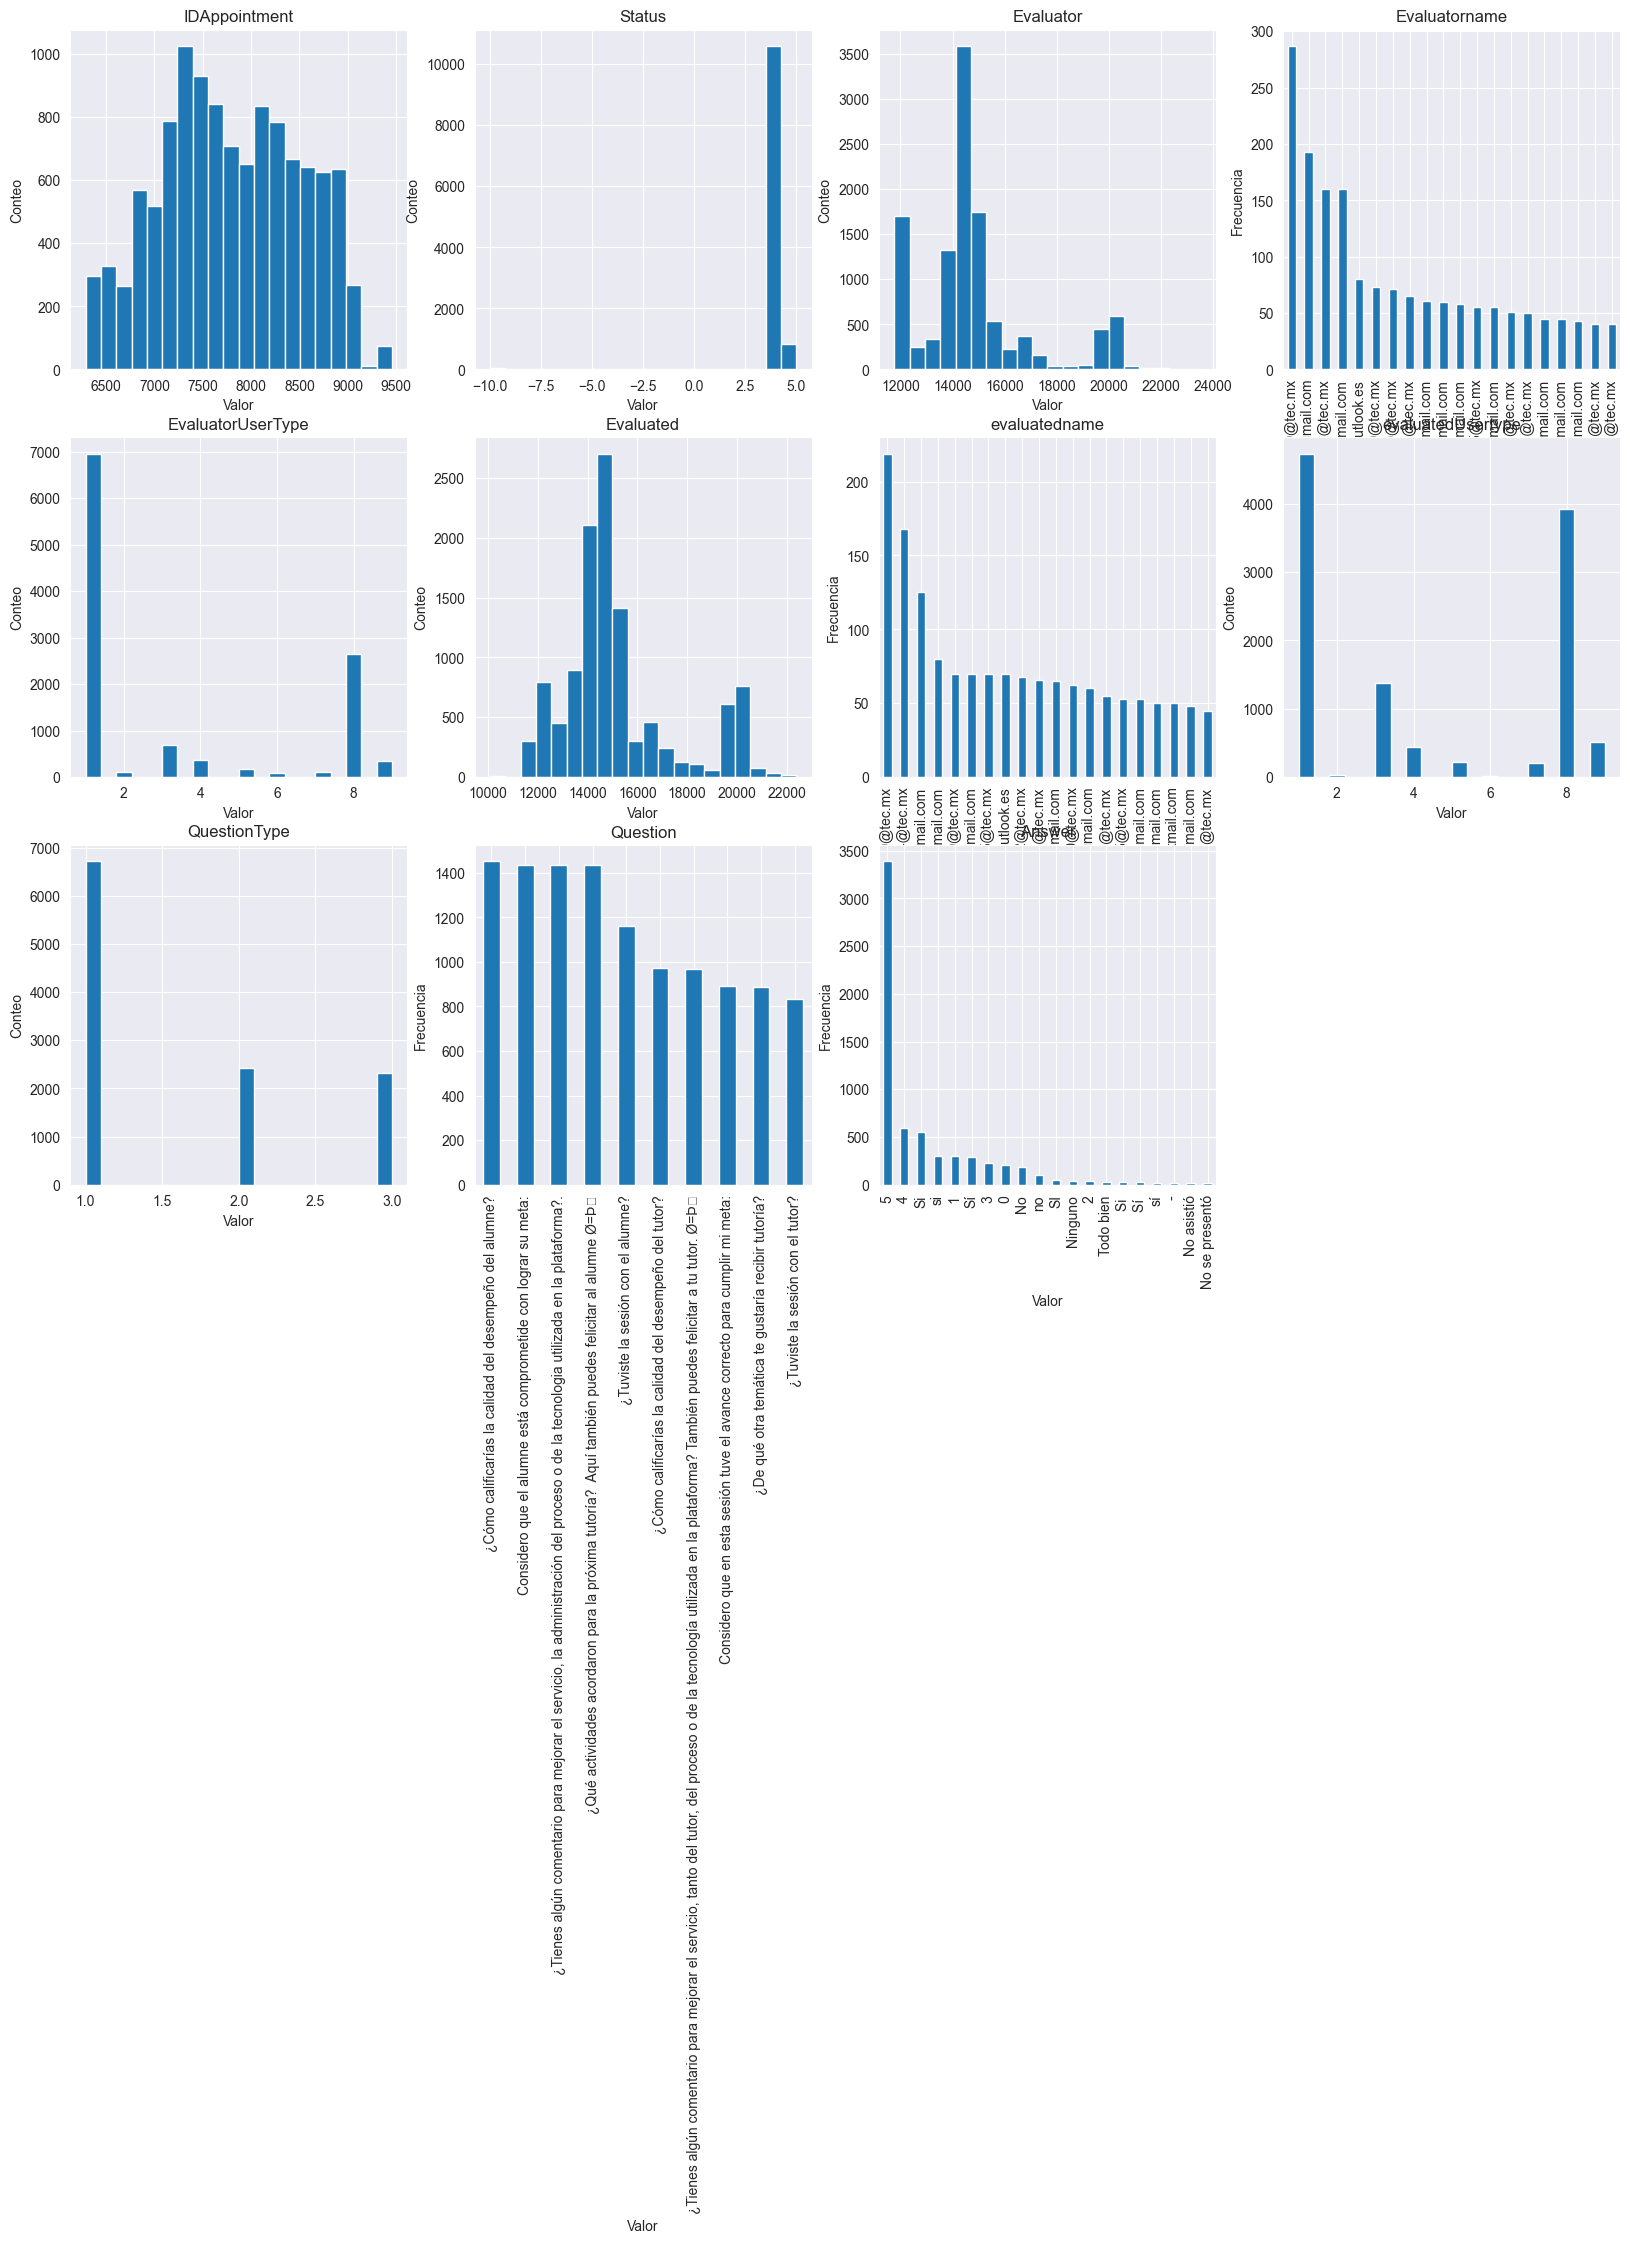

In [13]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosEvaluaciones.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosEvaluaciones.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosEvaluaciones[columna].dtype == 'object' or misdatosEvaluaciones[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosEvaluaciones[columna].dtype == 'object' or misdatosEvaluaciones[columna].dtype.name == 'category':
            conteo_categorias = misdatosEvaluaciones[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosEvaluaciones[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()


 ¿Hay correlación entre las variables dependientes e independientes?

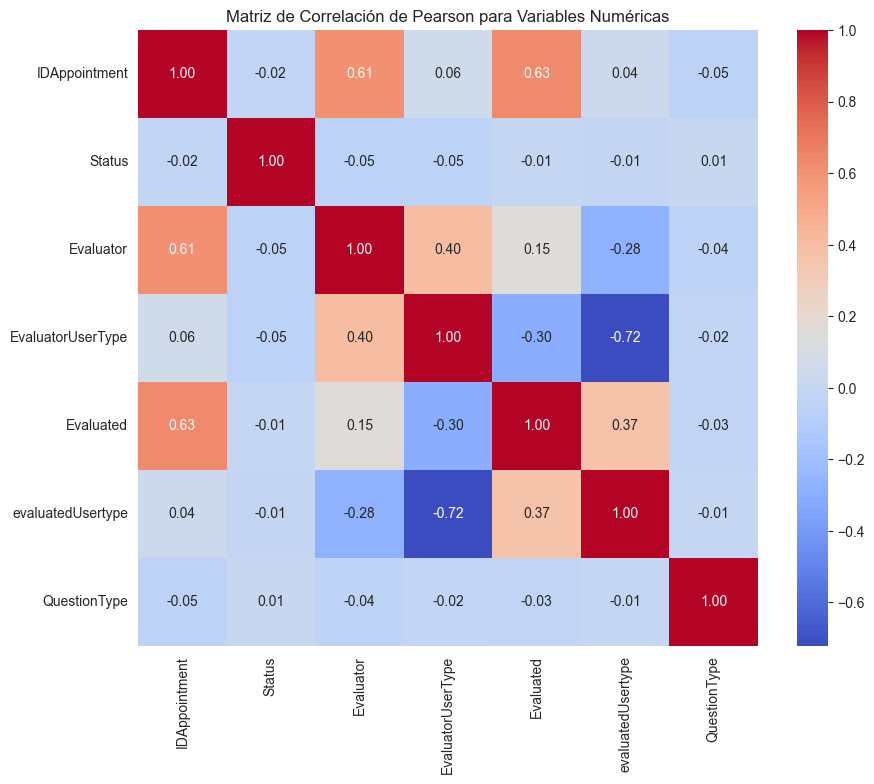

In [14]:

# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()

 ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

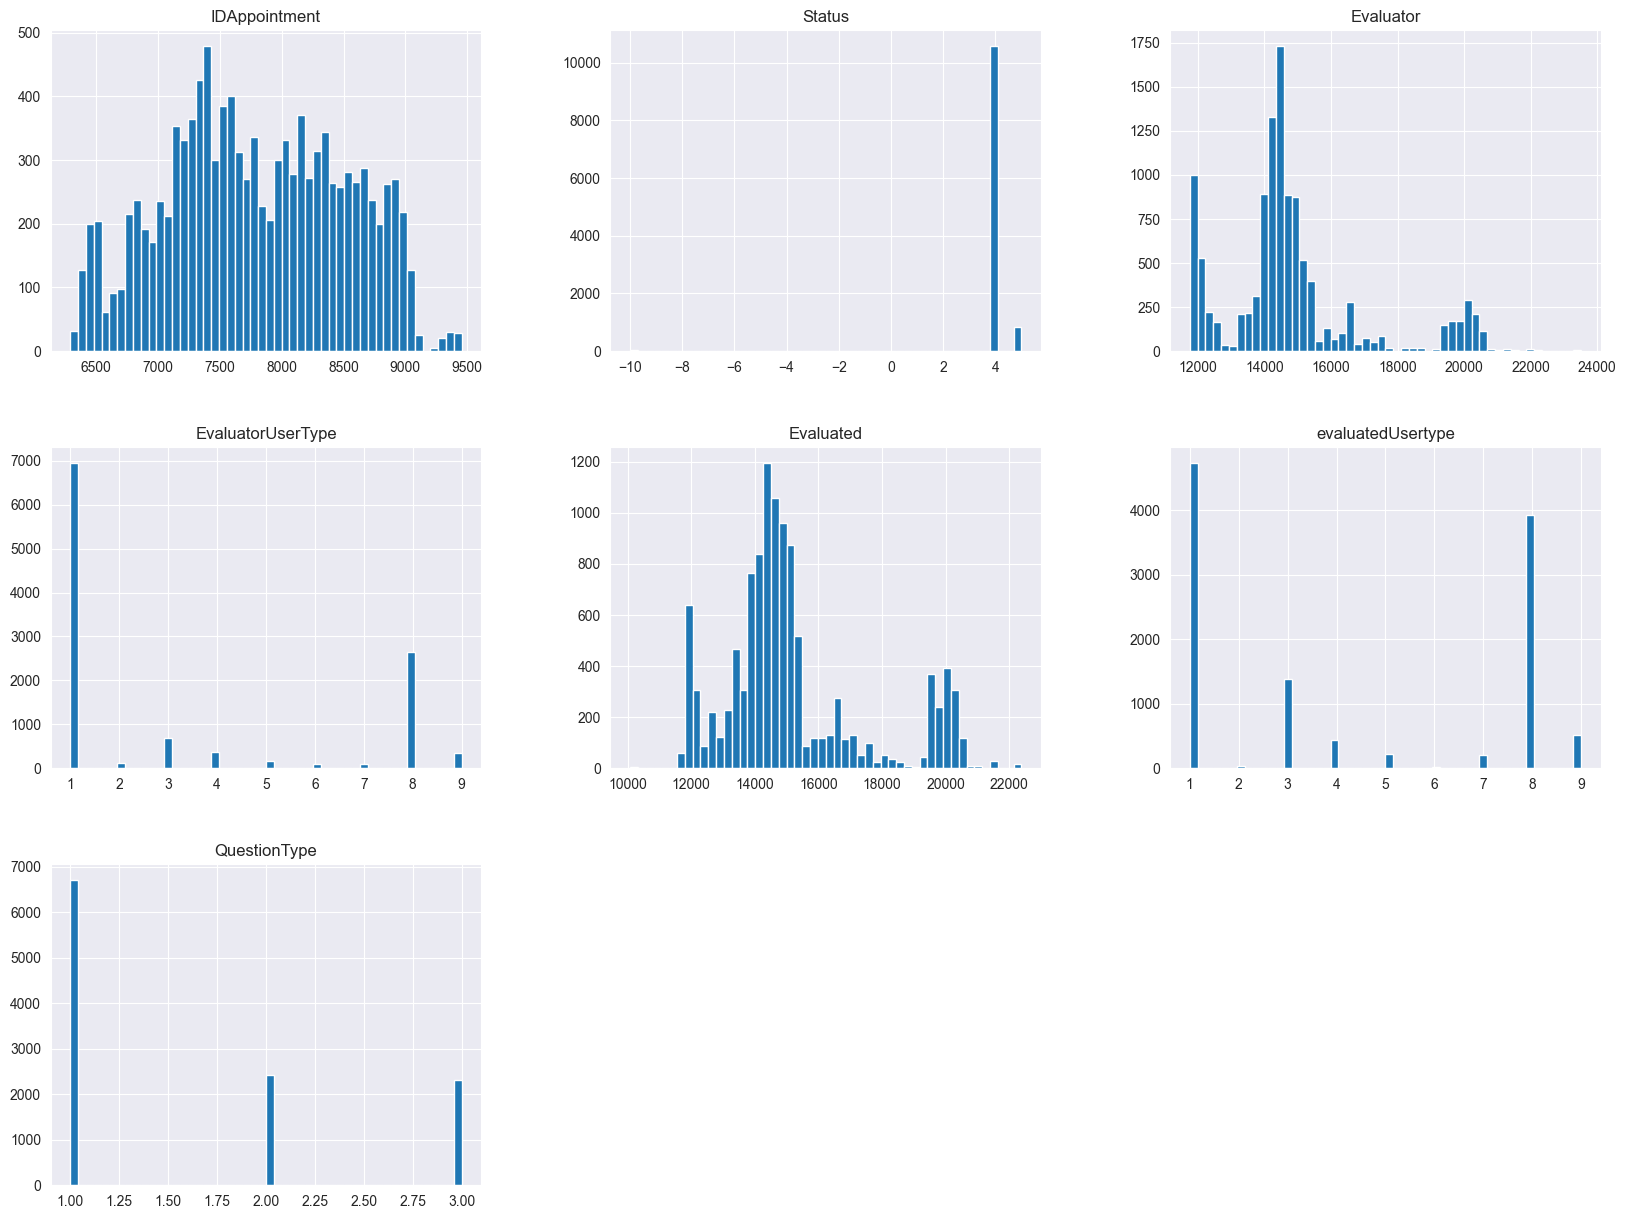

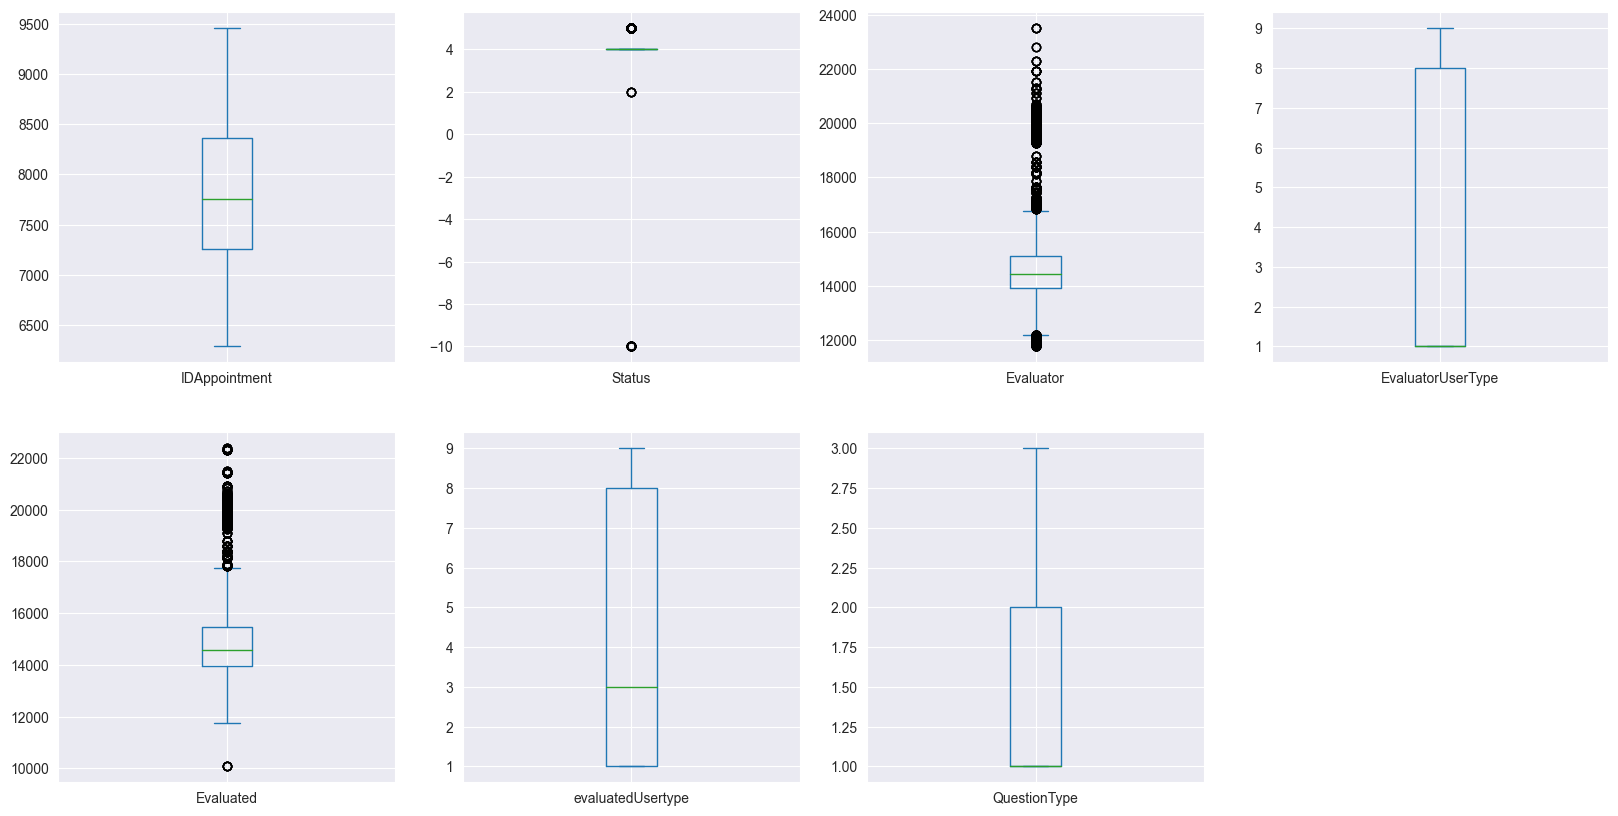

In [15]:
misdatosEvaluaciones.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosEvaluaciones.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()

¿Cómo se distribuyen los datos en función de diferentes categorías?

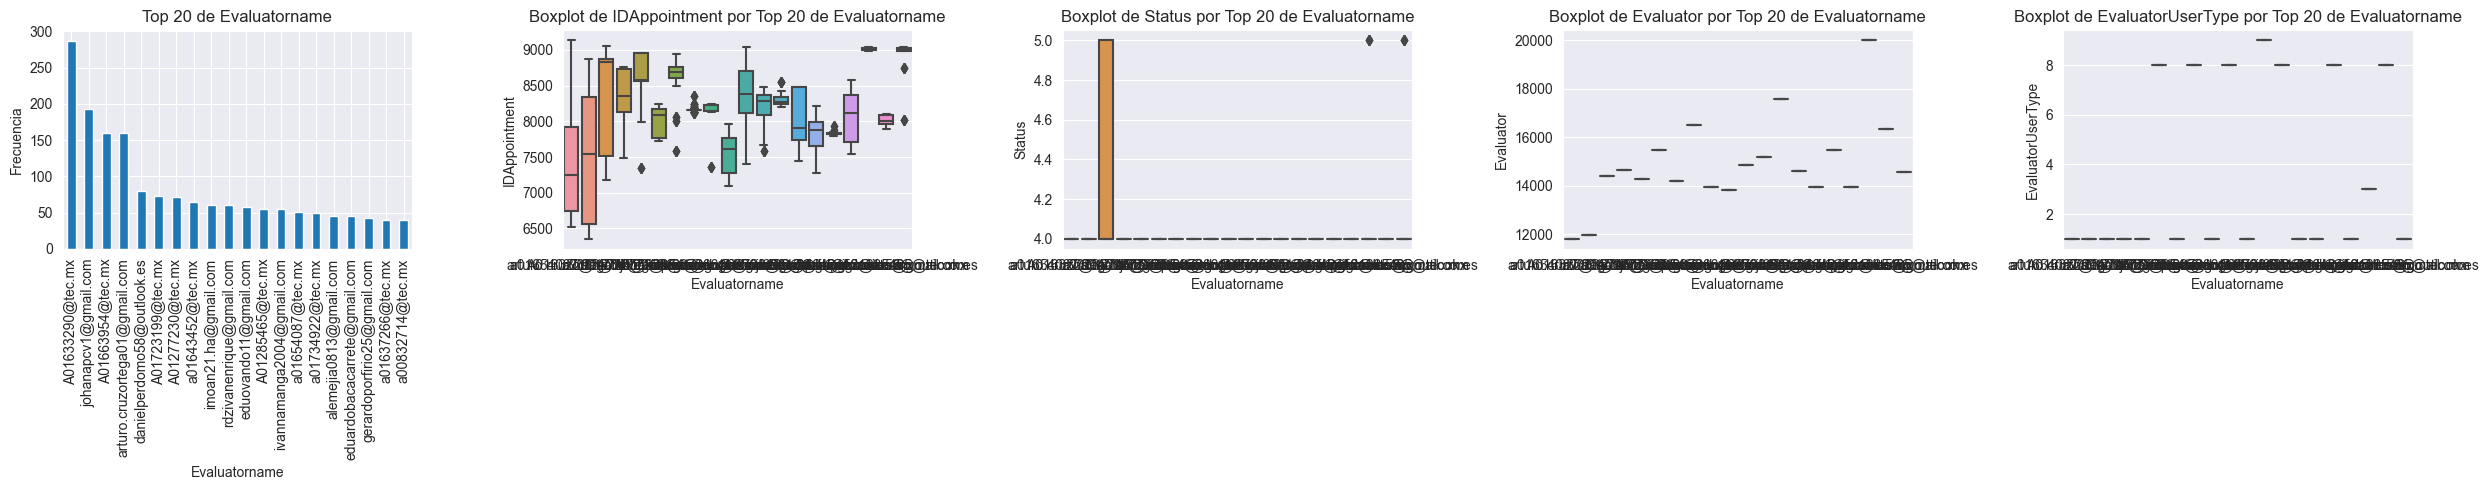

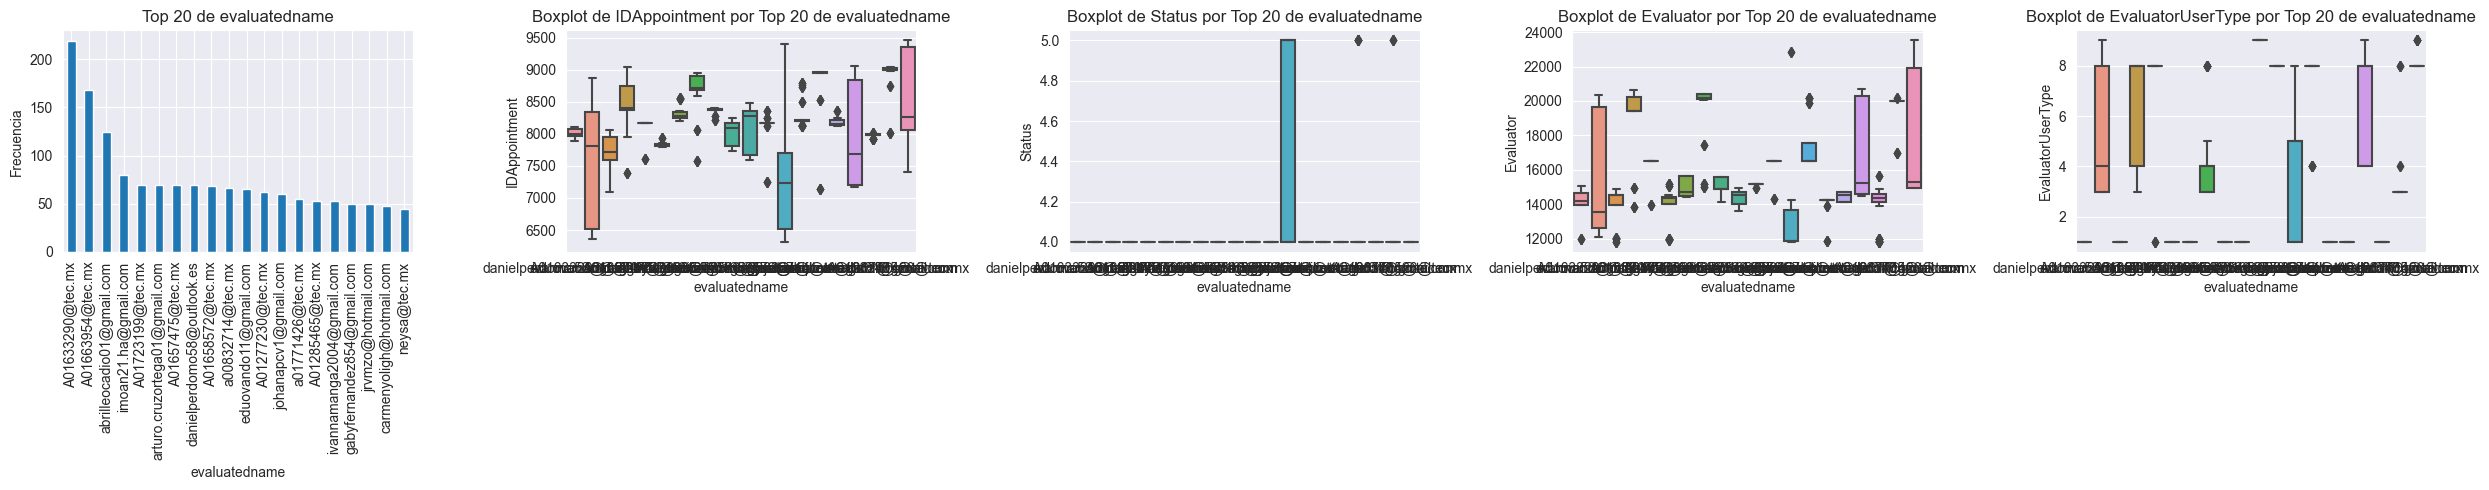

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\845836791.py:27: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\845836791.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


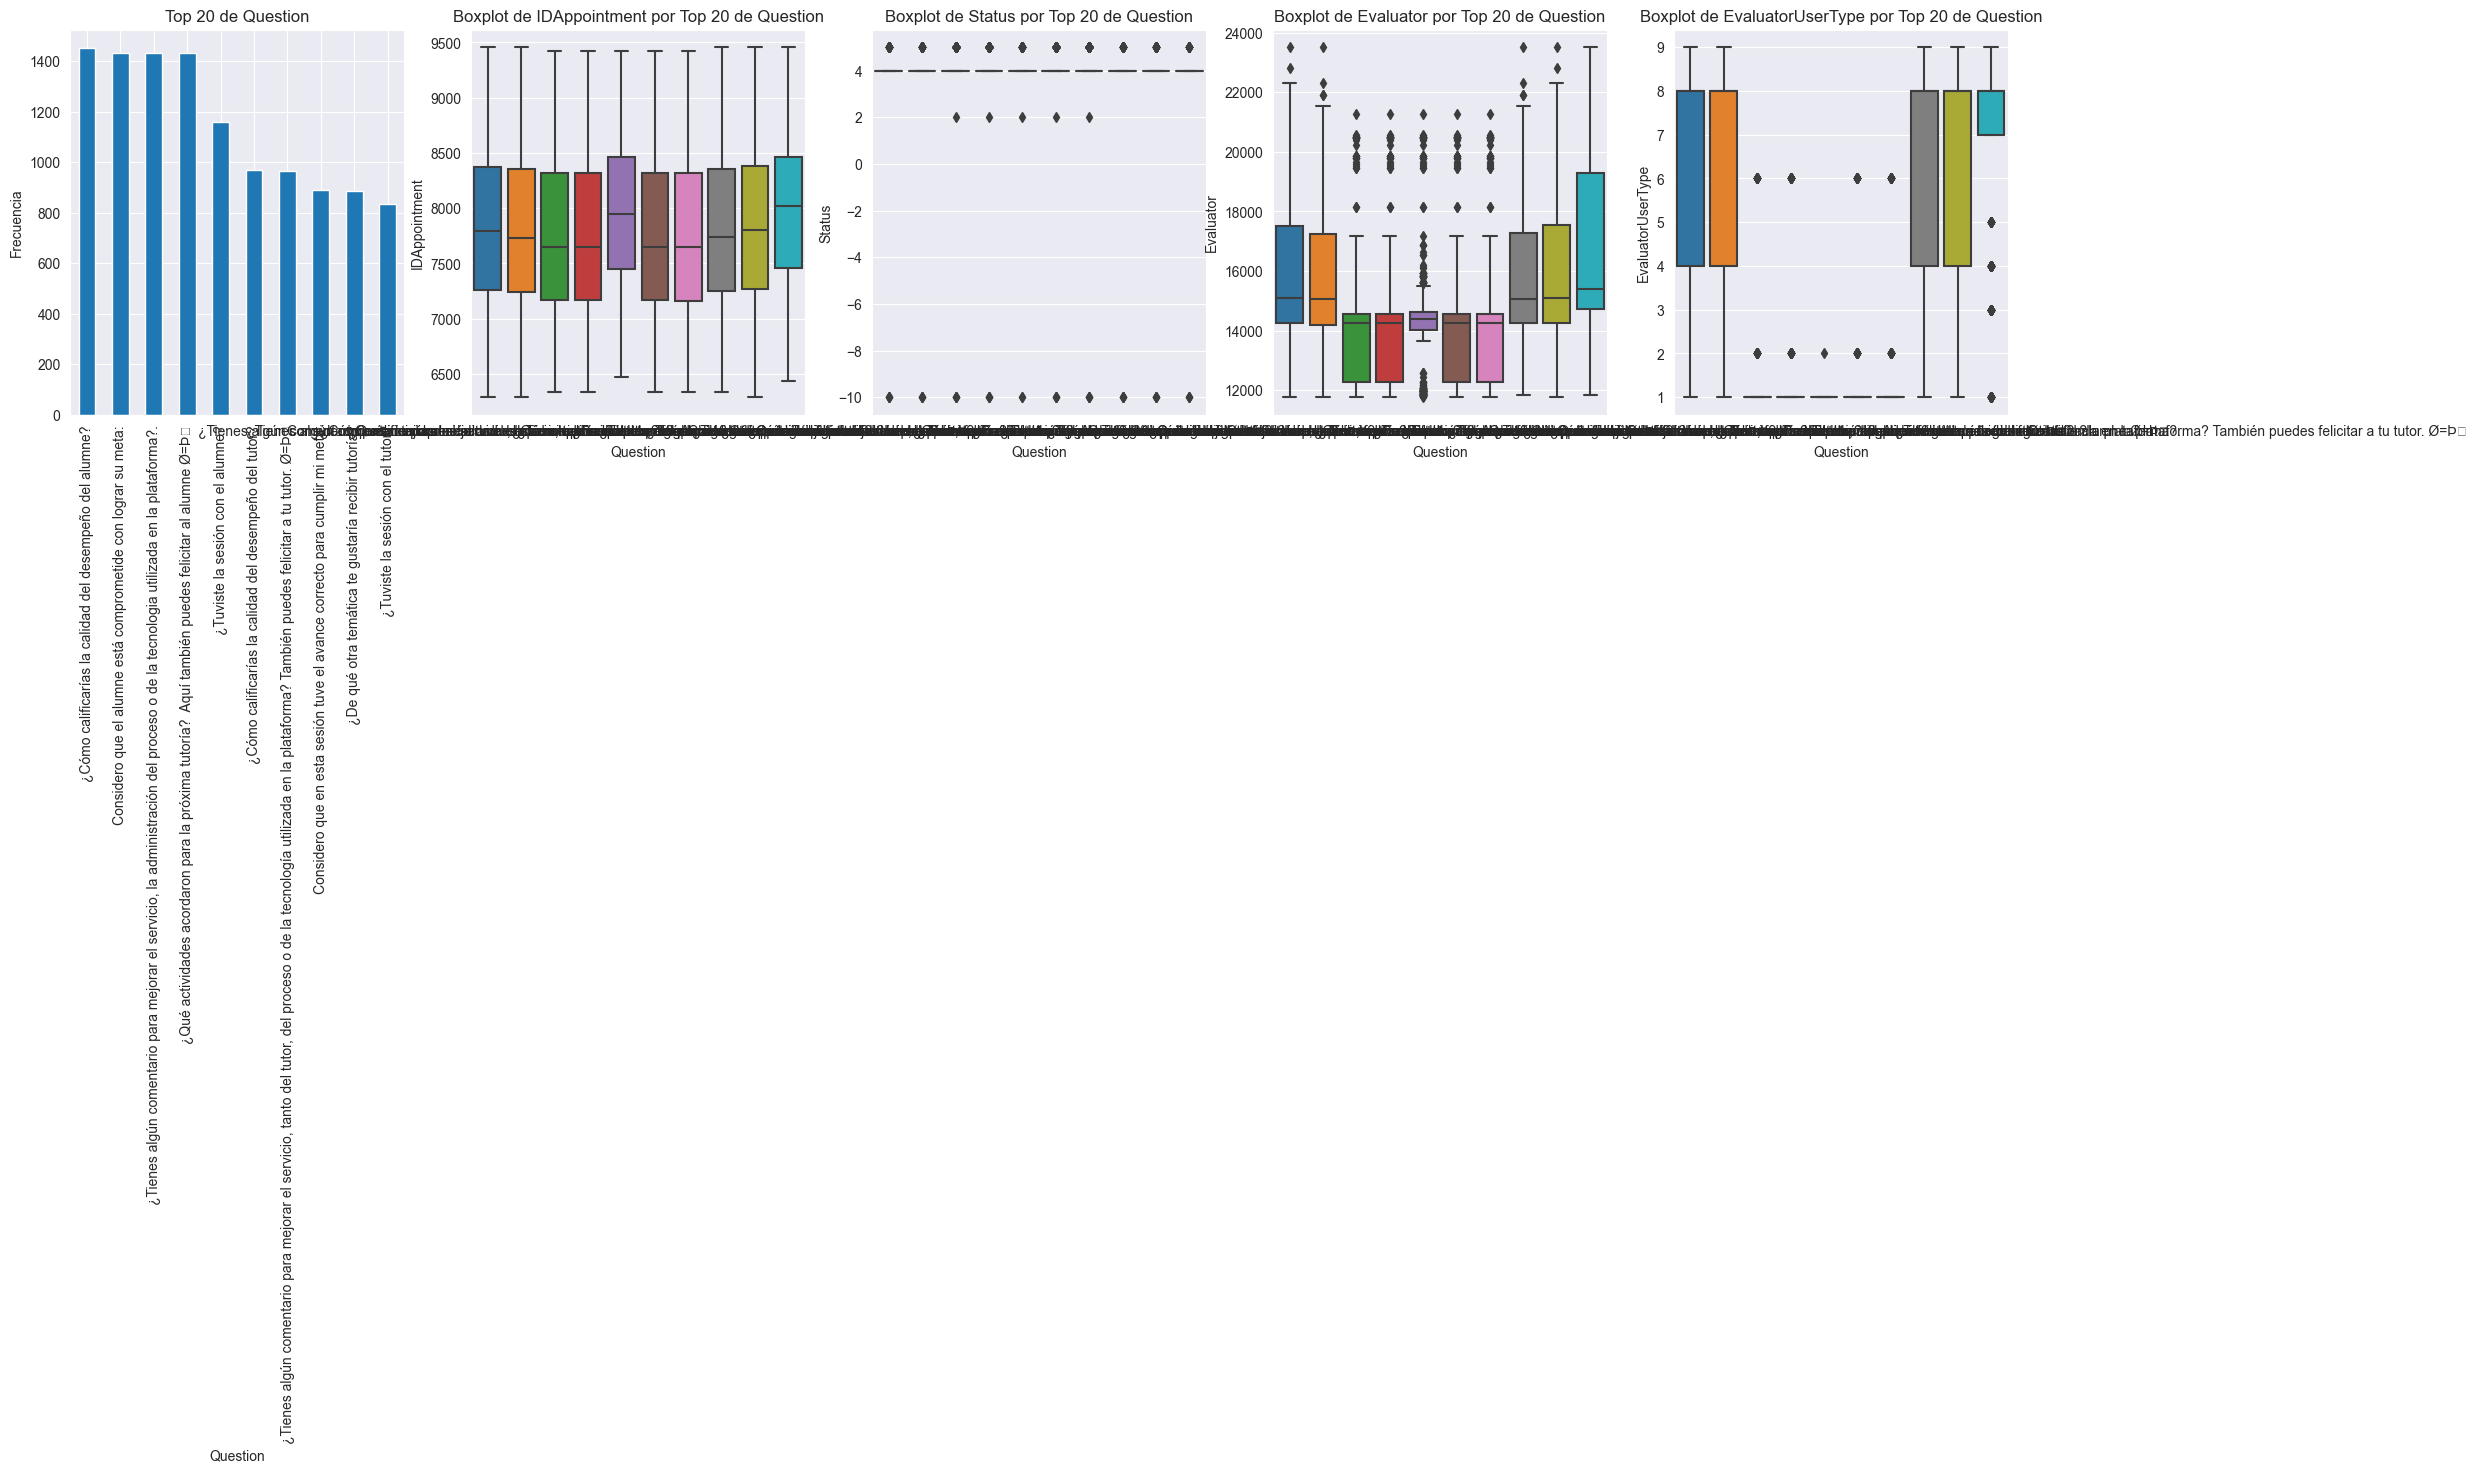

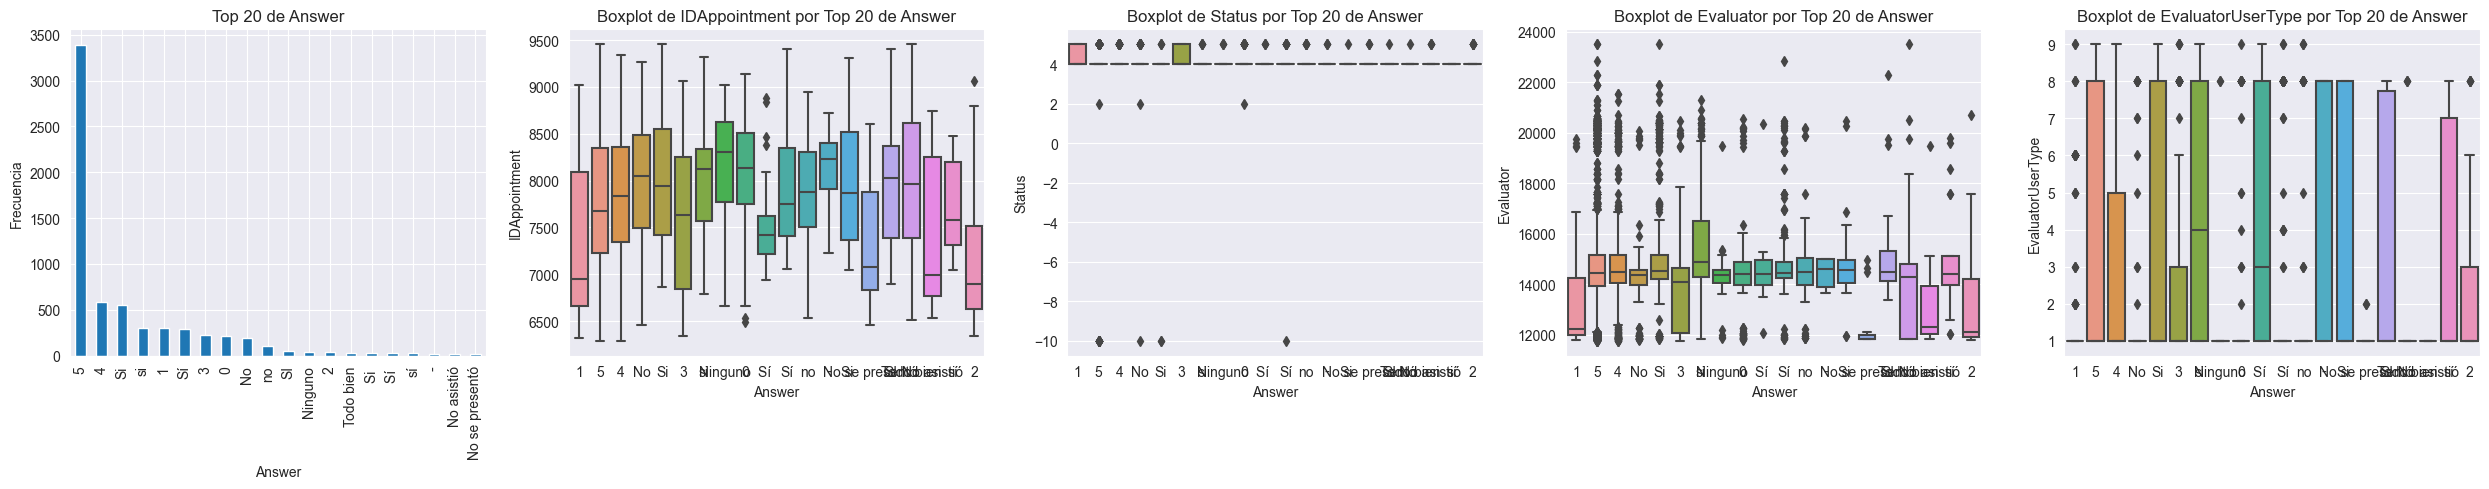

In [16]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosEvaluaciones.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosEvaluaciones[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosEvaluaciones[misdatosEvaluaciones[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [17]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosEvaluaciones.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valores únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)

Evaluatorname    1191
evaluatedname    1433
Question           10
Answer           2765
dtype: int64


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import itertools

# Seleccionar columnas numéricas
columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['int64', 'float64']).columns

# Ejecutar K-Means
kmeans = KMeans(n_clusters=3)
# Aquí asumimos que ya hemos ejecutado K-Means y añadido la columna 'cluster'
#misdatos['cluster'] = kmeans.fit_predict(misdatos[columnas_numericas])

# Combinaciones de todas las columnas numéricas
combinaciones = list(itertools.combinations(columnas_numericas, 2))

# Crear subplots
num_graficas = len(combinaciones)
num_filas = (num_graficas + 4) // 5  # Redondear hacia arriba
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

for i, (col1, col2) in enumerate(combinaciones):
    for cluster in range(3):  # Asumiendo 3 clusters
        cluster_data = misdatosEvaluaciones[misdatosEvaluaciones['cluster'] == cluster]
        axs[i].scatter(cluster_data[col1], cluster_data[col2], label=f'Cluster {cluster}')
    
    axs[i].set_title(f'{col1} vs {col2}')
    axs[i].set_xlabel(col1)
    axs[i].set_ylabel(col2)
    axs[i].legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()


NameError: name 'misdatos' is not defined

¿Hay desequilibrio en las clases de la variable objetivo?

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\1876136890.py:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\1876136890.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


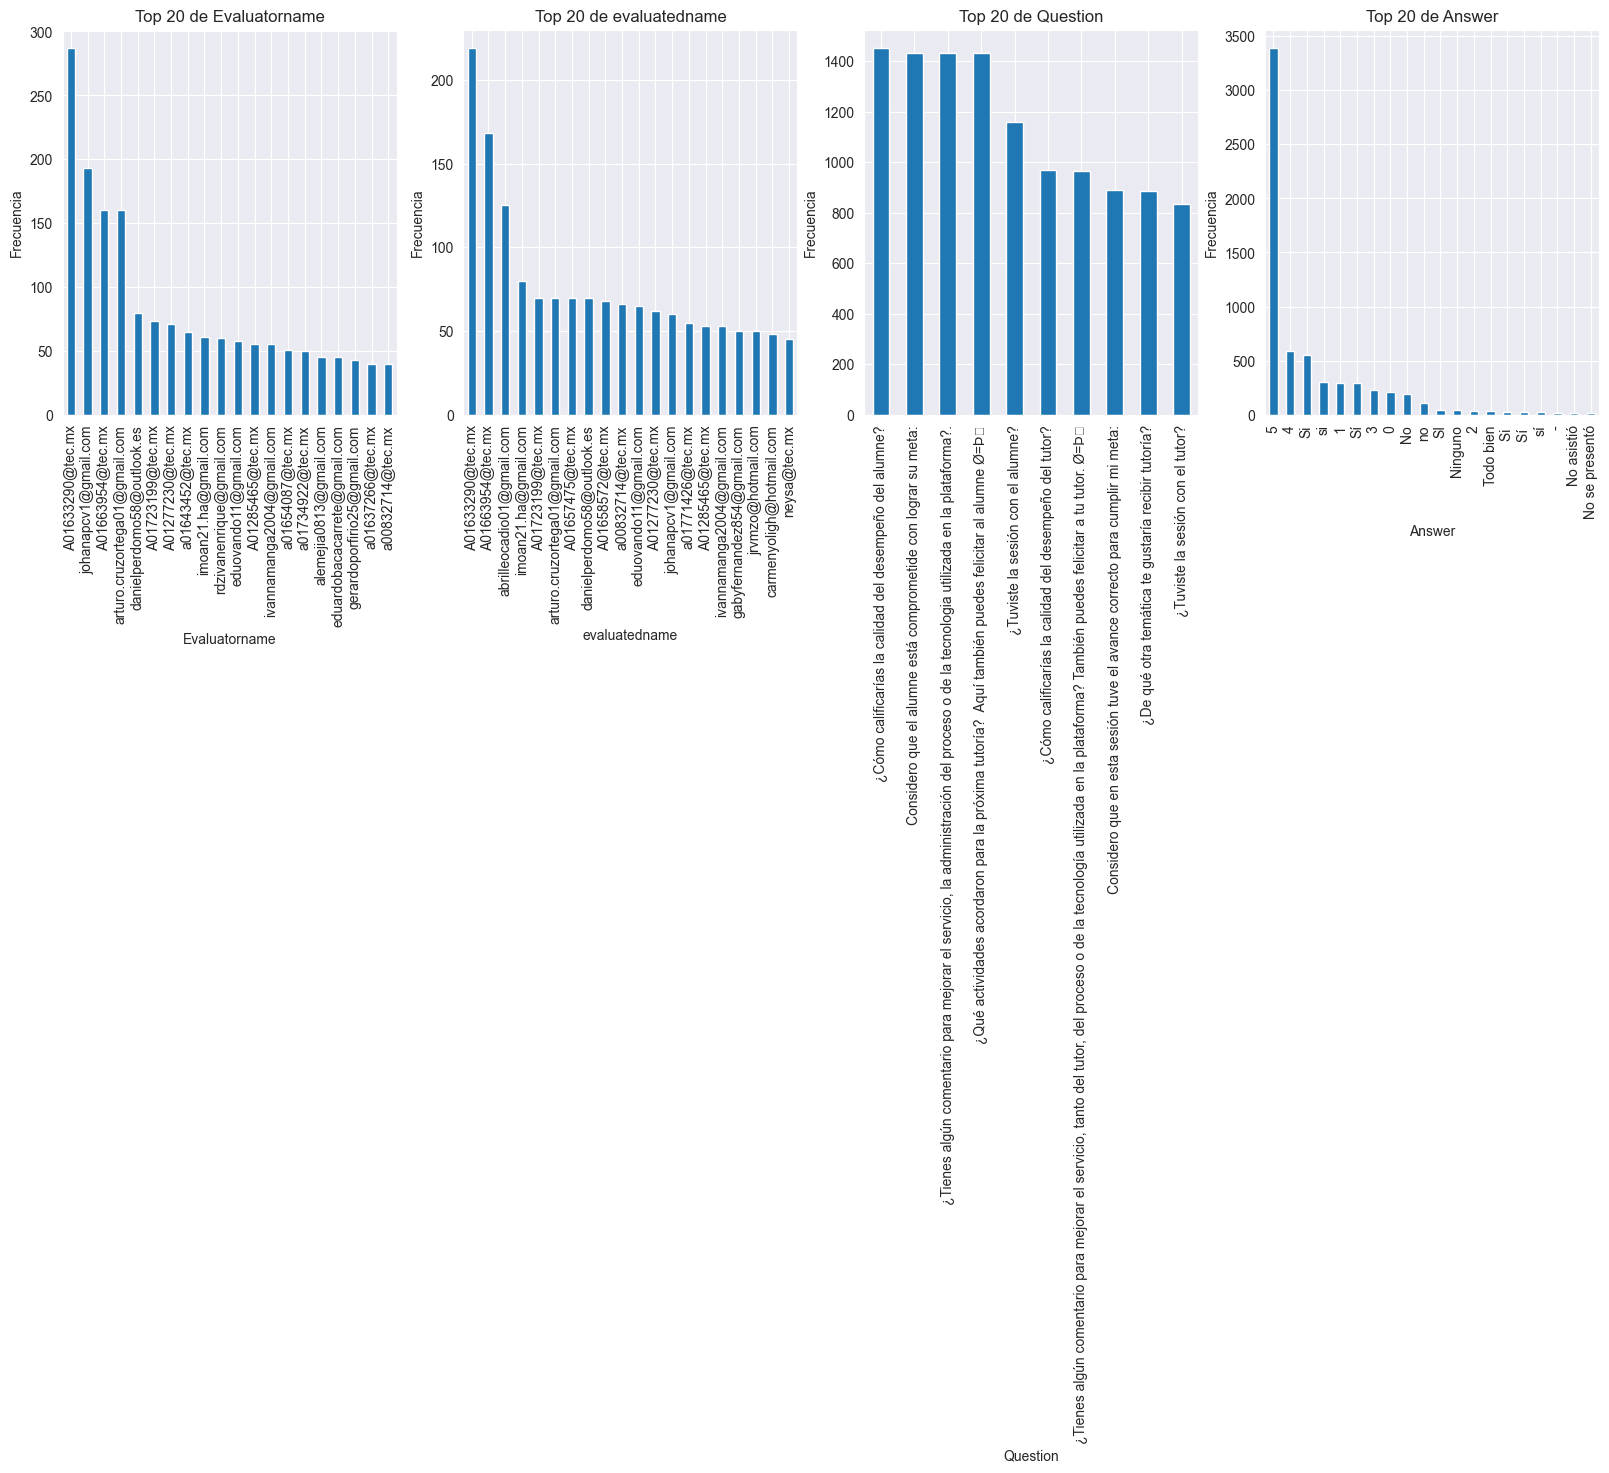

In [21]:
# Identificar columnas categóricas
columnas_categoricas = misdatosEvaluaciones.select_dtypes(include=['object', 'category']).columns

# Crear subplots
num_columnas = len(columnas_categoricas)
num_filas = (num_columnas + 4) // 5  # Redondear hacia arriba para asegurar que todas las columnas se incluyan
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

# Iterar sobre las columnas categóricas y crear gráficos de barras para el top 20
for i, columna in enumerate(columnas_categoricas):
    top_20 = misdatosEvaluaciones[columna].value_counts().head(20)
    top_20.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Top 20 de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

# Ocultar los ejes que no se usan (si los hay)
for i in range(len(columnas_categoricas), len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout y mostrar gráfico
plt.tight_layout()
plt.show()

# Numero Tutorias

In [22]:
misdatosNumTutorias = pd.read_excel("Numero de tutorias brindadas 23JAN.xlsx")
misdatosNumTutorias.describe()

ID      Minutos      Estatus      AlumnoID       TutorID
count  2790.000000  2790.000000  2790.000000   2790.000000   2790.000000
mean   7843.586022    39.992832     1.869892  16249.911111  13876.363799
std     868.052552     0.267692     4.598150   3004.107919   1610.109078
min    6328.000000    30.000000   -13.000000  11851.000000  11772.000000
25%    7110.250000    40.000000     2.000000  13667.500000  12168.000000
50%    7833.500000    40.000000     4.000000  15159.000000  14214.000000
75%    8562.750000    40.000000     4.000000  19594.250000  14562.000000
max    9554.000000    40.000000     5.000000  23702.000000  23660.000000

In [23]:
misdatosNumTutorias

ID   FechayHoraTutoria  Minutos  Estatus  AlumnoID  \
0     6328 2022-09-05 13:00:00       40      -10     11922   
1     6337 2022-09-10 16:00:00       40        4     11958   
2     6342 2022-09-20 17:20:00       40        5     12047   
3     6343 2022-09-25 13:20:00       40        2     12056   
4     6344 2022-09-28 10:20:00       40        5     11964   
...    ...                 ...      ...      ...       ...   
2785  9545 2024-01-16 20:45:00       40        4     22813   
2786  9547 2024-01-17 20:45:00       40        4     22813   
2787  9551 2024-01-18 21:15:00       40        4     22813   
2788  9552 2024-01-21 19:15:00       40       -2     22813   
2789  9554 2024-01-26 20:45:00       40        0     23702   

                             EmailAlumno  TutorID  \
0            romanalejandro333@gmail.com    11917   
1     lili.hernandezreyes.1070@gmail.com    11944   
2              aritorres112005@gmail.com    11887   
3                       a01652733@tec.mx    11929   
4                moises.emma@outlook.com    11968   
...                                  ...      ...   
2785            lilimares.mlmj@gmail.com    14529   
2786            lilimares.mlmj@gmail.com    14529   
2787            lilimares.mlmj@gmail.com    14529   
2788            lilimares.mlmj@gmail.com    14529   
2789             barcam.torres@gmail.com    14529   

                       EmailTutor     Category  \
0         andres.zenteno@live.com  Matemáticas   
1                a01638394@tec.mx  Matemáticas   
2     alejandra.vzarate@gmail.com  Matemáticas   
3                A01637537@tec.mx  Matemáticas   
4        al02896389@tecmilenio.mx  Matemáticas   
...                           ...          ...   
2785             a01771426@tec.mx  Matemáticas   
2786             a01771426@tec.mx  Matemáticas   
2787             a01771426@tec.mx  Matemáticas   
2788             a01771426@tec.mx  Matemáticas   
2789             a01771426@tec.mx  Matemáticas   

                                            SubCatName Secondcategory  \
0     Ángulos, triángulos y relaciones trigonométricas            NaN   
1                        Sumas y sucesiones de números    Matemáticas   
2               Razón de cambio y concepto de derivada    Matemáticas   
3                               Ecuaciones cuadráticas    Matemáticas   
4                                  Ecuaciones lineales    Matemáticas   
...                                                ...            ...   
2785                                           Calculo    Matemáticas   
2786                                           Calculo    Matemáticas   
2787                                           Calculo    Matemáticas   
2788                                           Calculo    Matemáticas   
2789                                           Calculo    Matemáticas   

                SecondSubCatName  \
0                            NaN   
1         Ecuaciones cuadráticas   
2             Área bajo la curva   
3     Estadística y probabilidad   
4         Ecuaciones cuadráticas   
...                          ...   
2785               Trigonometría   
2786               Trigonometría   
2787               Trigonometría   
2788               Trigonometría   
2789               Trigonometría   

                                            Observation  
0                                                   NaN  
1                                          Matemáticas   
2                                               Todoooo  
3                                              Química   
4                         Me gustaría estudiar álgebra   
...                                                 ...  
2785                                        Matematicas  
2786                                        Matematicas  
2787                                        Matematicas  
2788                                        Matematicas  
2789  Simbología matemática y notaciones compactas, ...  

[2790 rows x 13 co

In [24]:
print(misdatosNumTutorias.dtypes)
print("------------------------------------")
print(misdatosNumTutorias.nunique())

ID                            int64
FechayHoraTutoria    datetime64[ns]
Minutos                       int64
Estatus                       int64
AlumnoID                      int64
EmailAlumno                  object
TutorID                       int64
EmailTutor                   object
Category                     object
SubCatName                   object
Secondcategory               object
SecondSubCatName             object
Observation                  object
dtype: object
------------------------------------
ID                   2790
FechayHoraTutoria    2200
Minutos                 2
Estatus                10
AlumnoID             1574
EmailAlumno          1574
TutorID               731
EmailTutor            731
Category                7
SubCatName             51
Secondcategory          7
SecondSubCatName       60
Observation          1790
dtype: int64


In [25]:
# Contar NaN y 0
nan_count = misdatosNumTutorias.isna().sum()
zero_count = misdatosNumTutorias.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 ID                     0
FechayHoraTutoria      0
Minutos                0
Estatus                0
AlumnoID               0
EmailAlumno            0
TutorID                0
EmailTutor             0
Category               0
SubCatName             0
Secondcategory        87
SecondSubCatName      87
Observation          519
dtype: int64

Conteo de 0 por columna:
 ID                   0
FechayHoraTutoria    0
Minutos              0
Estatus              1
AlumnoID             0
EmailAlumno          0
TutorID              0
EmailTutor           0
Category             0
SubCatName           0
Secondcategory       0
SecondSubCatName     0
Observation          0
dtype: int64

Total de NaN en el DataFrame: 693
Total de 0 en el DataFrame: 1


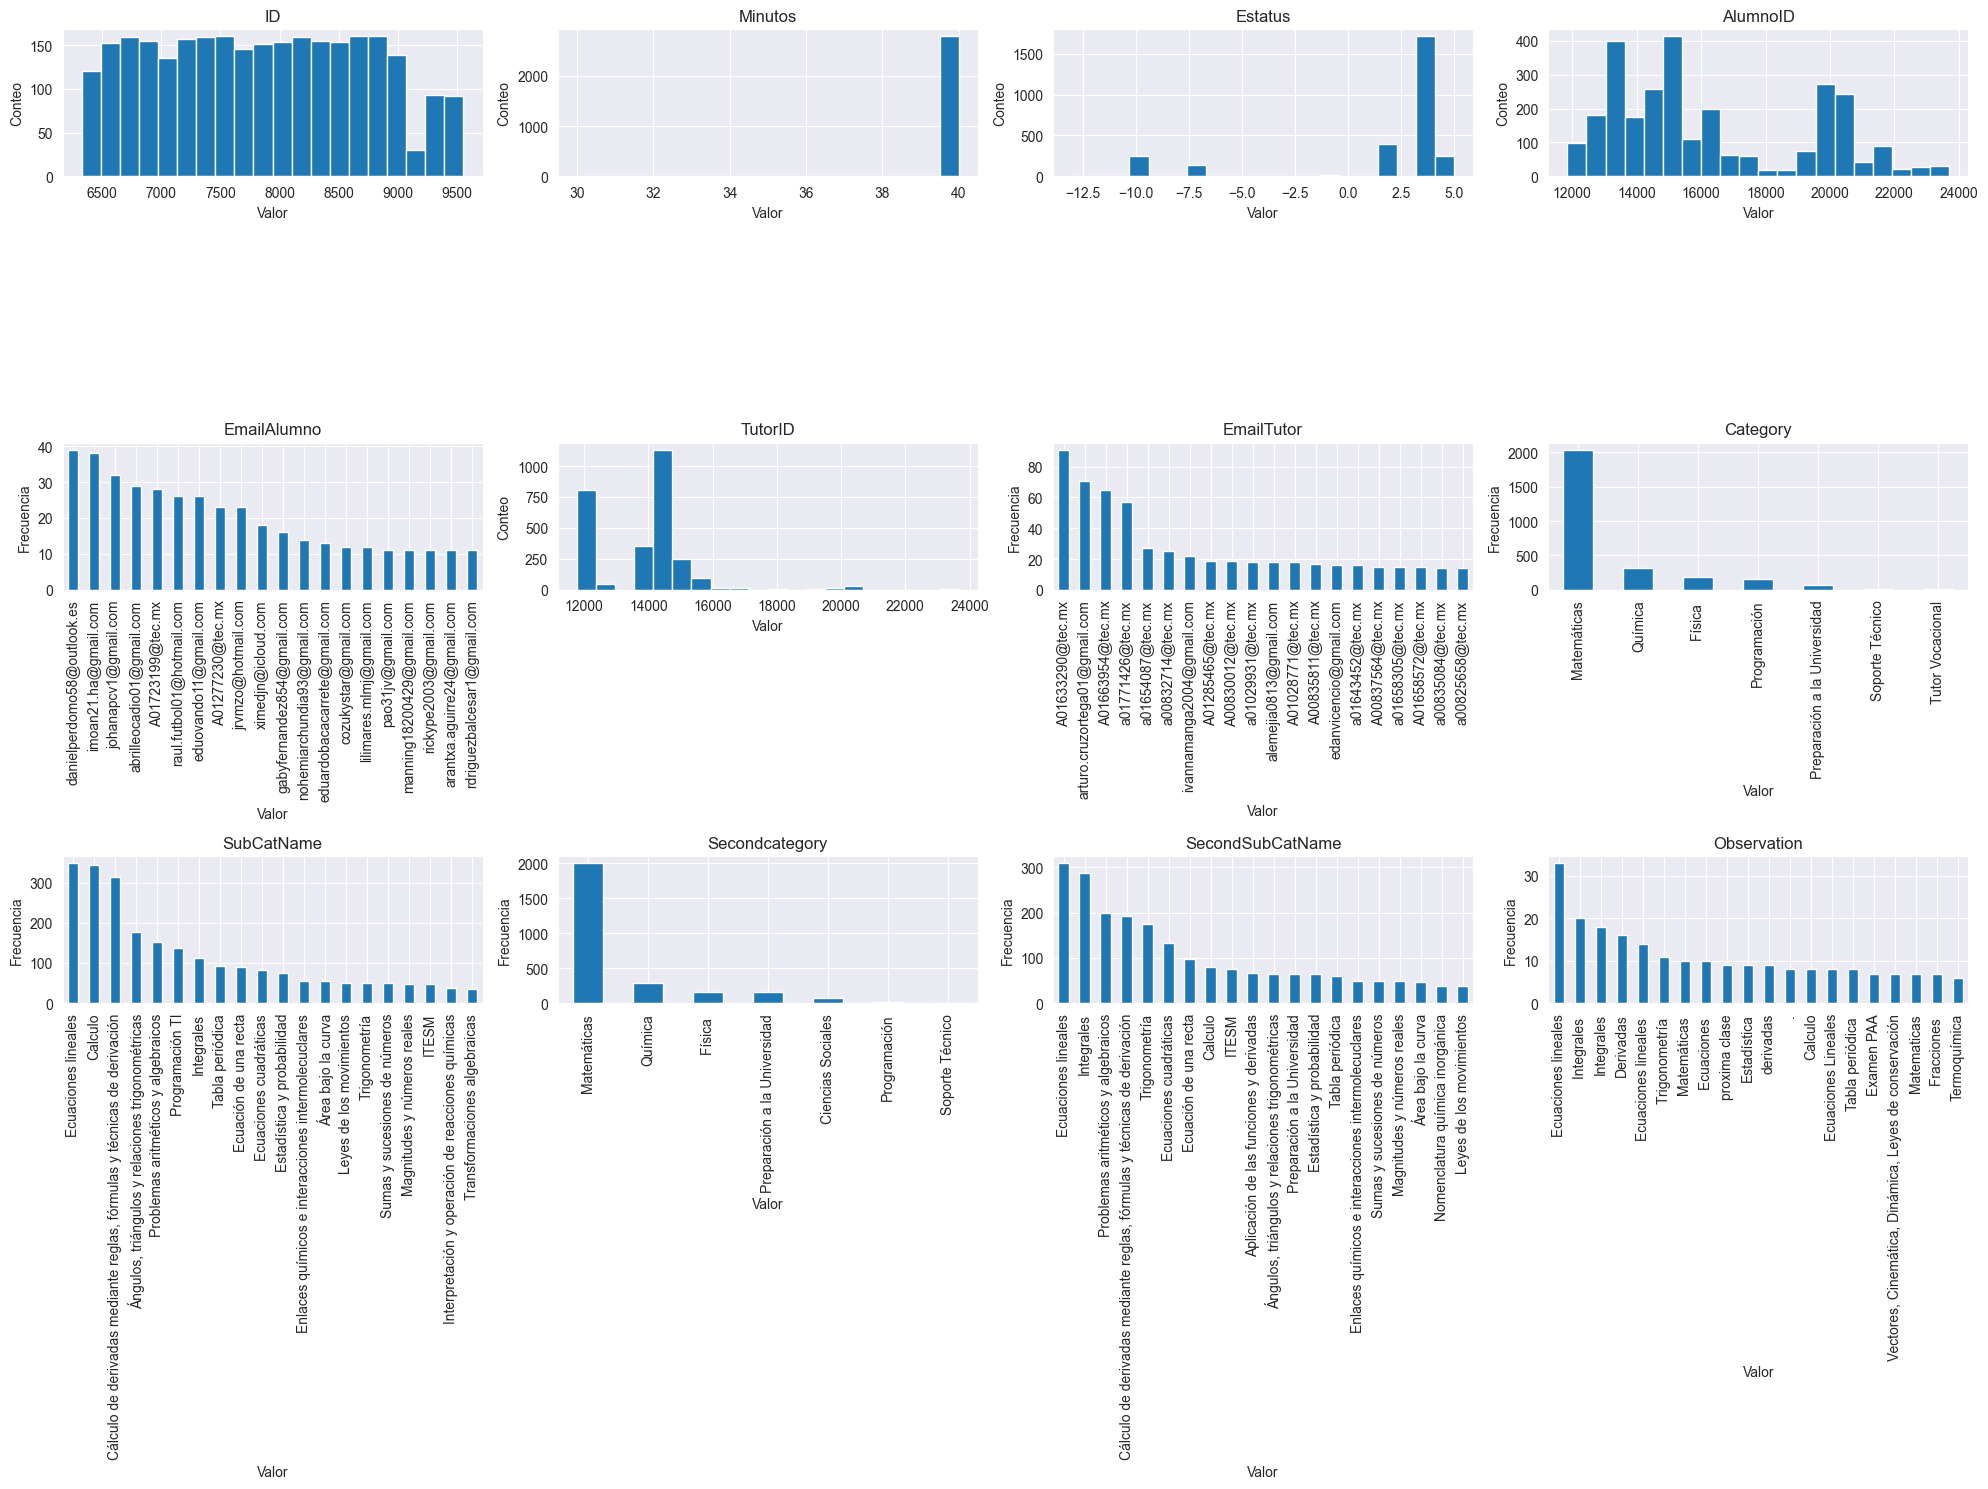

In [26]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosNumTutorias.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosNumTutorias.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosNumTutorias[columna].dtype == 'object' or misdatosNumTutorias[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosNumTutorias[columna].dtype == 'object' or misdatosNumTutorias[columna].dtype.name == 'category':
            conteo_categorias = misdatosNumTutorias[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosNumTutorias[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()

¿Hay correlación entre las variables dependientes e independientes?

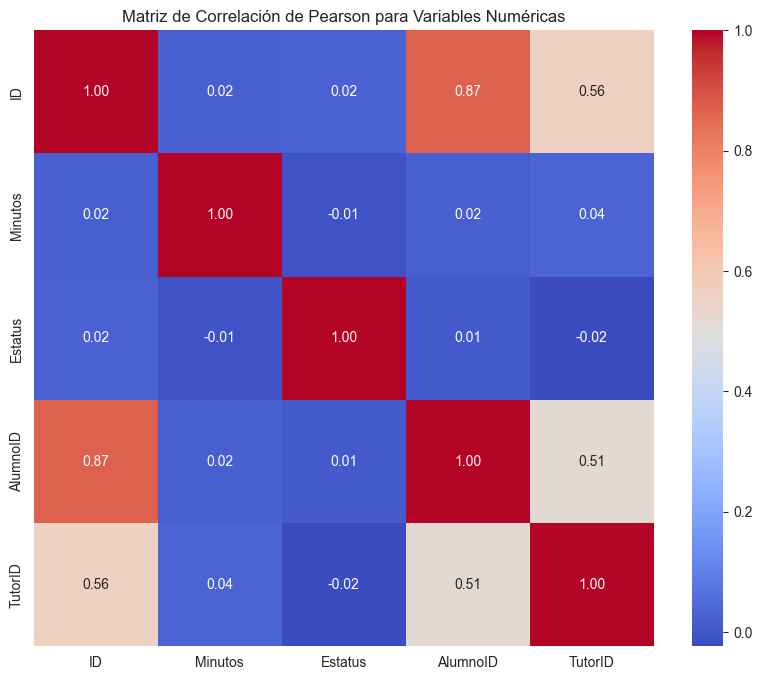

In [27]:
# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosNumTutorias.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()


¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

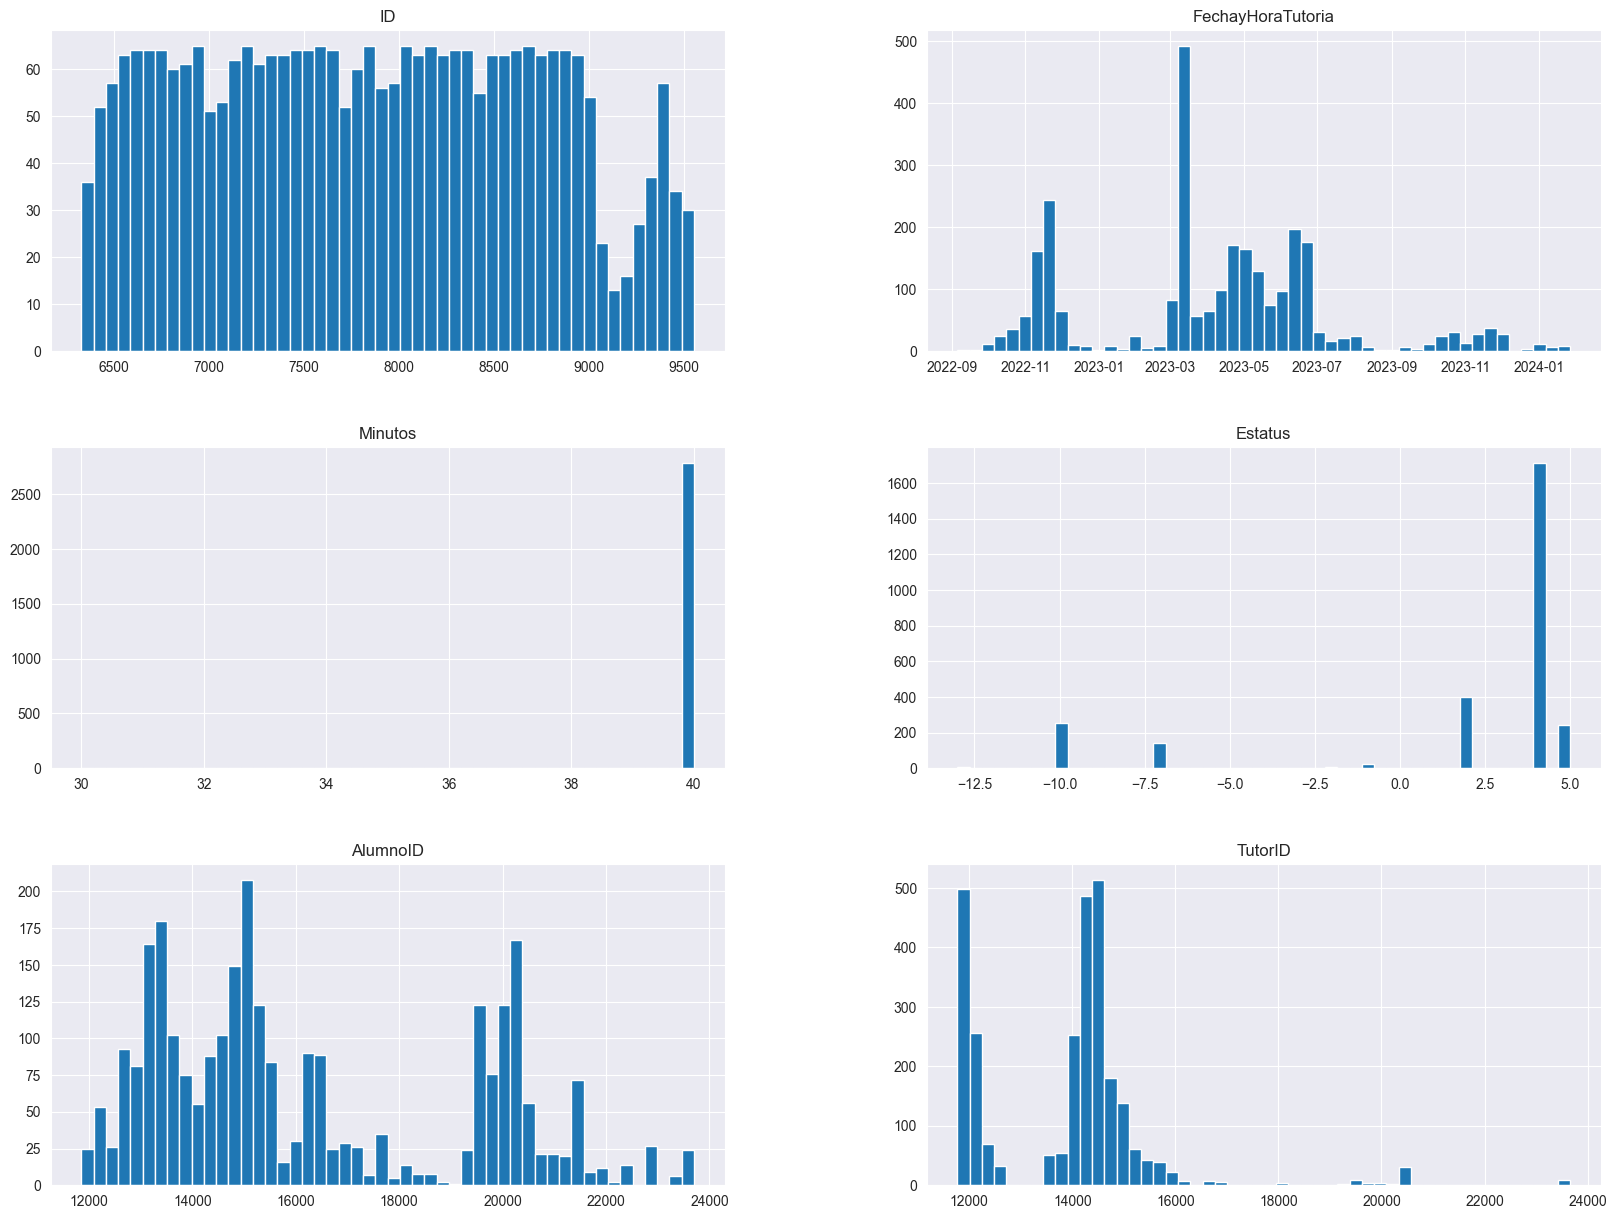

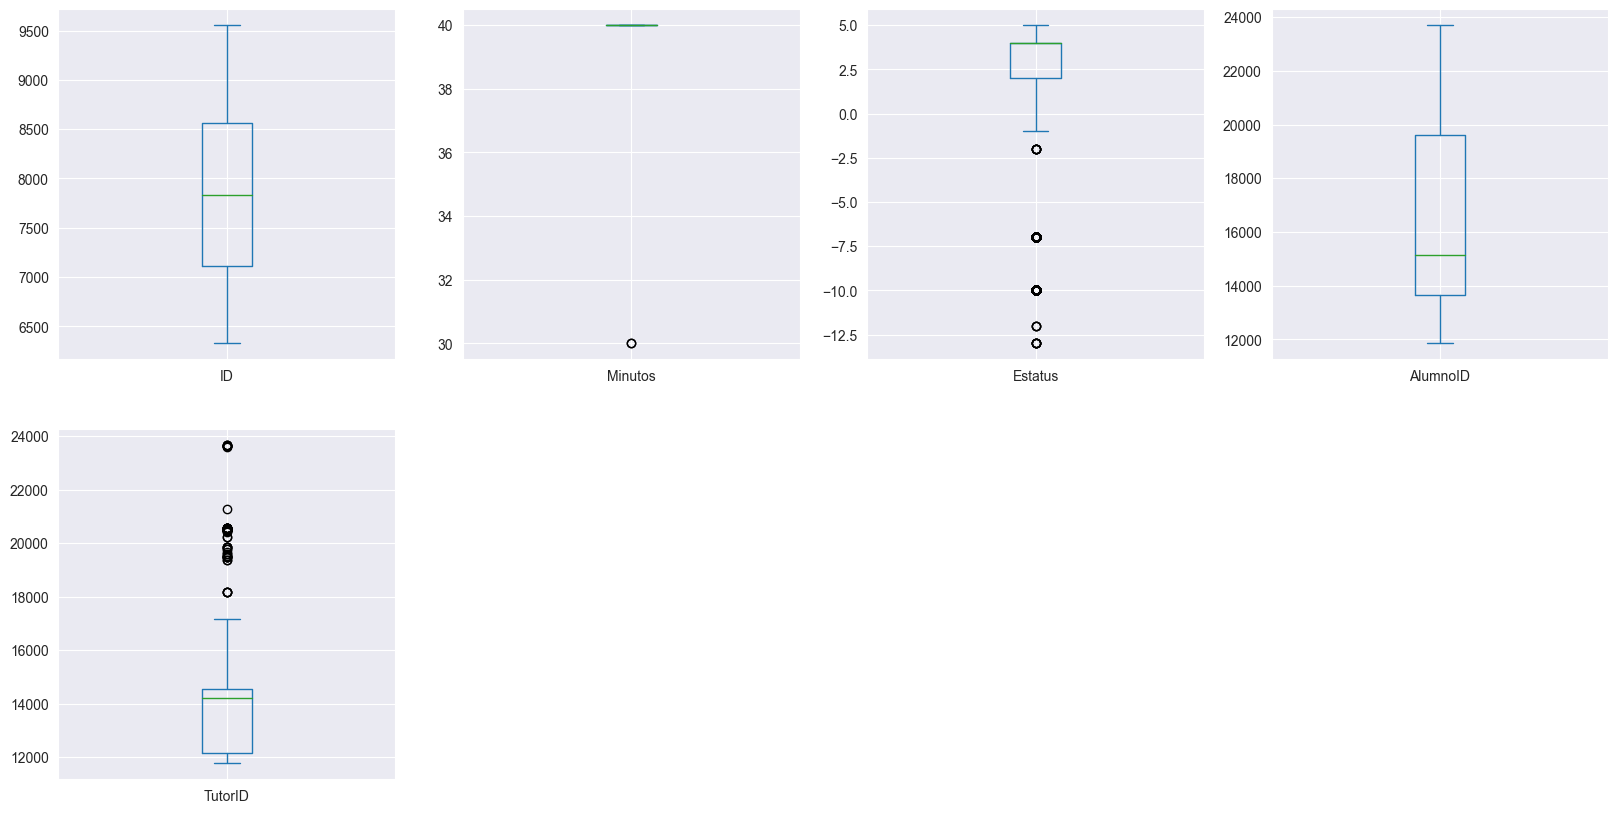

In [28]:
misdatosNumTutorias.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosNumTutorias.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()





¿Cómo se distribuyen los datos en función de diferentes categorías?

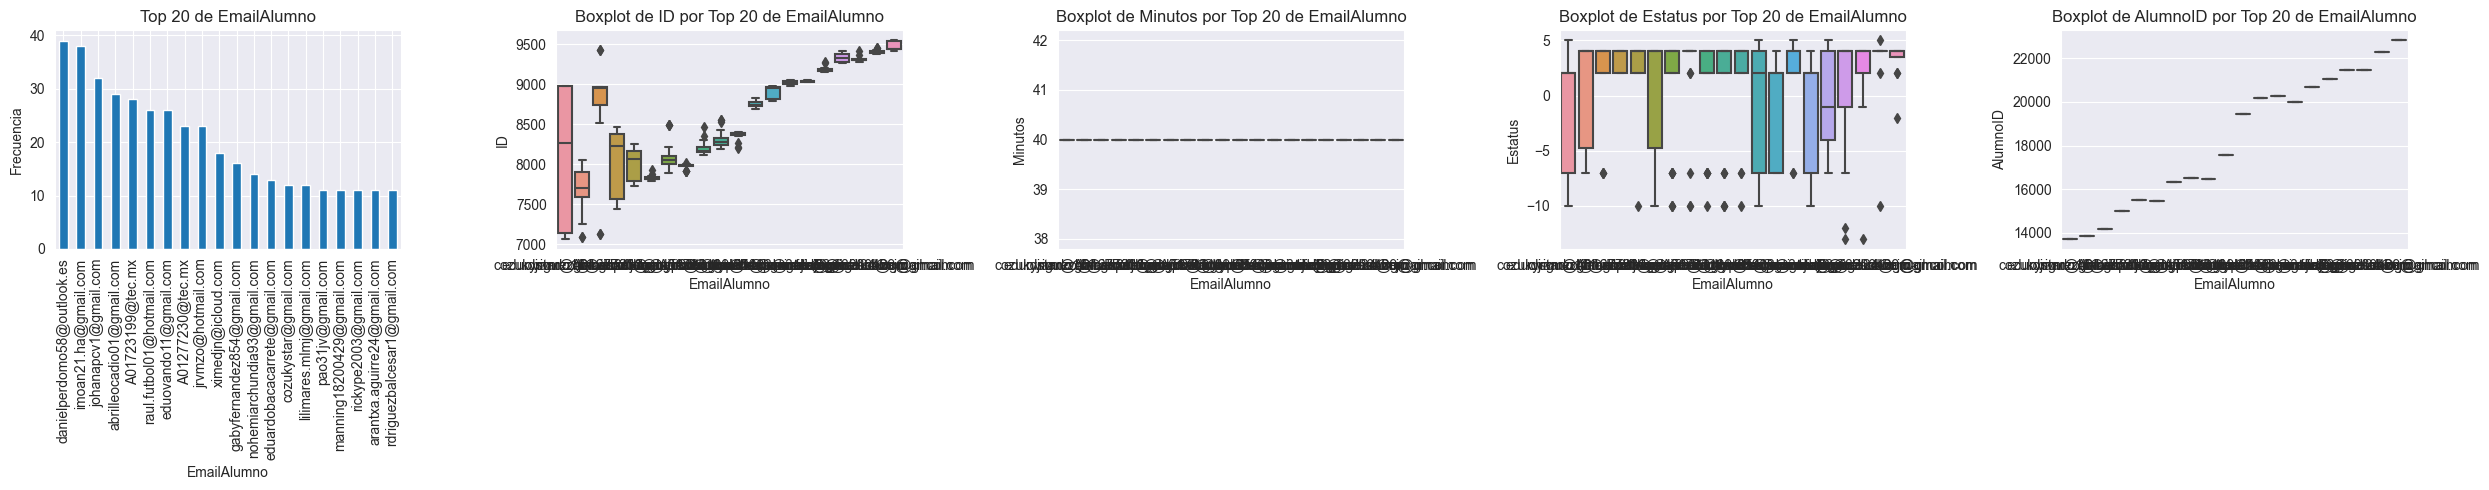

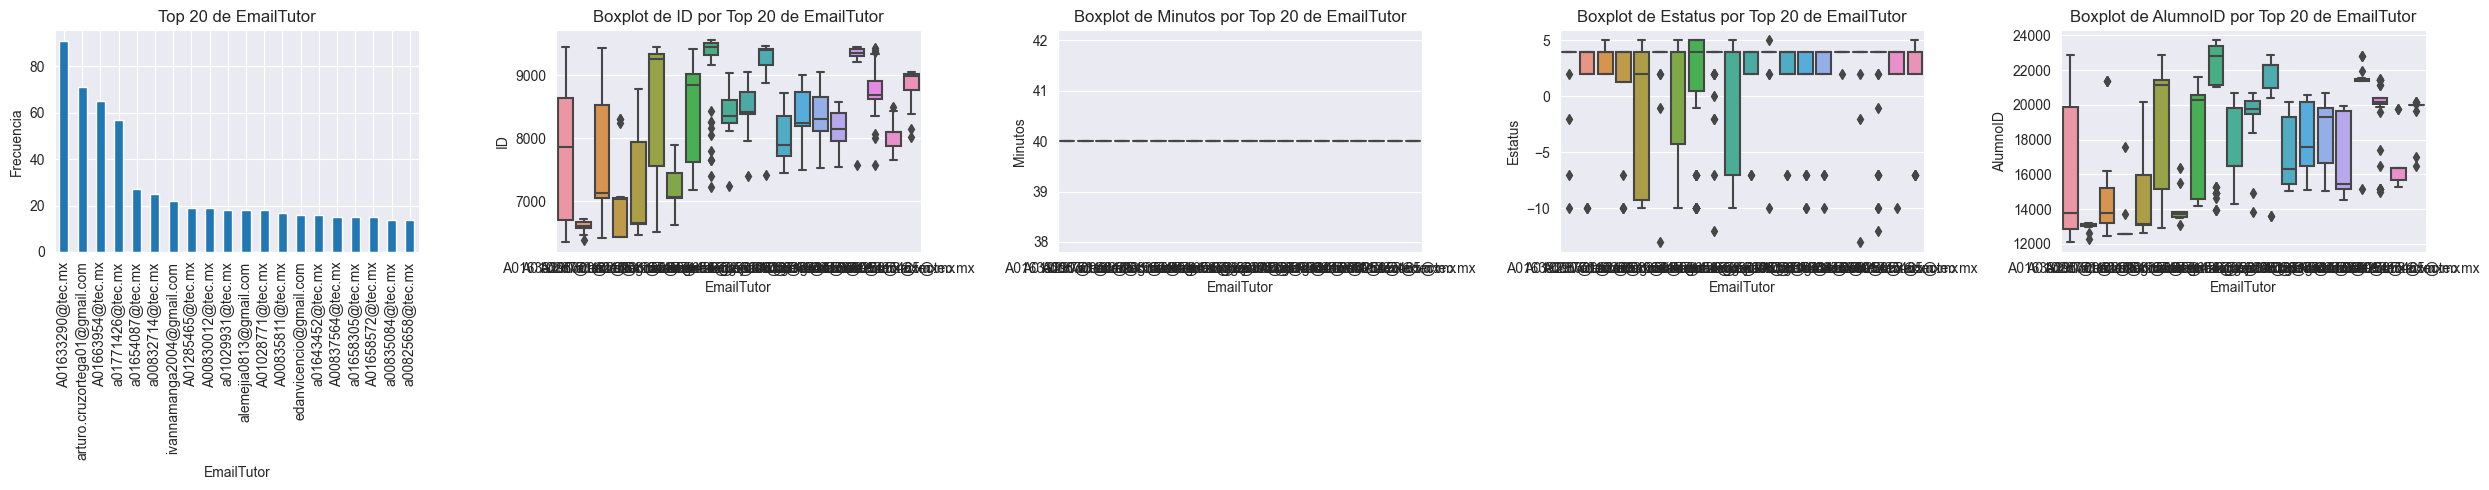

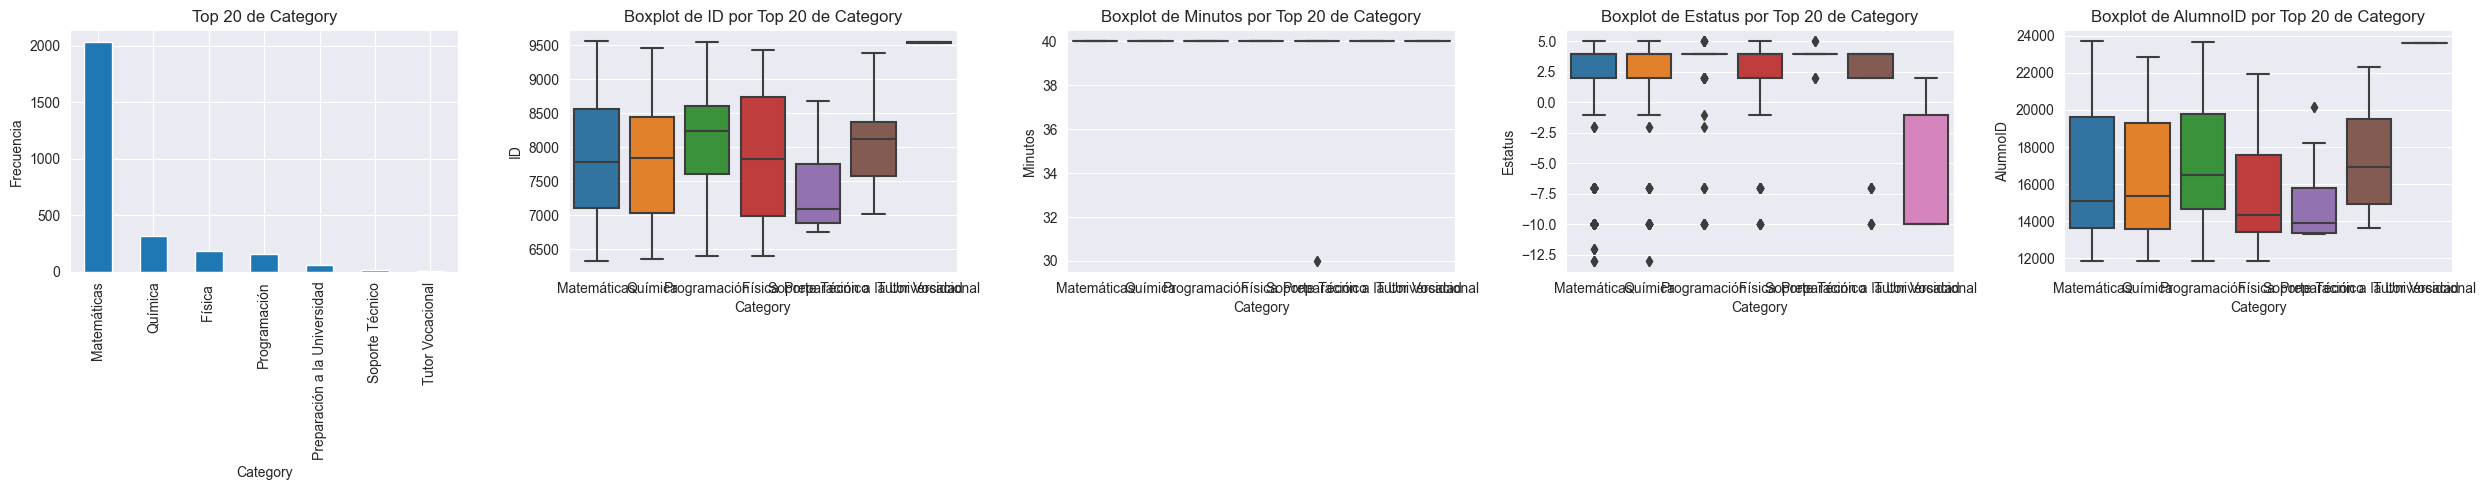

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\4220515450.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


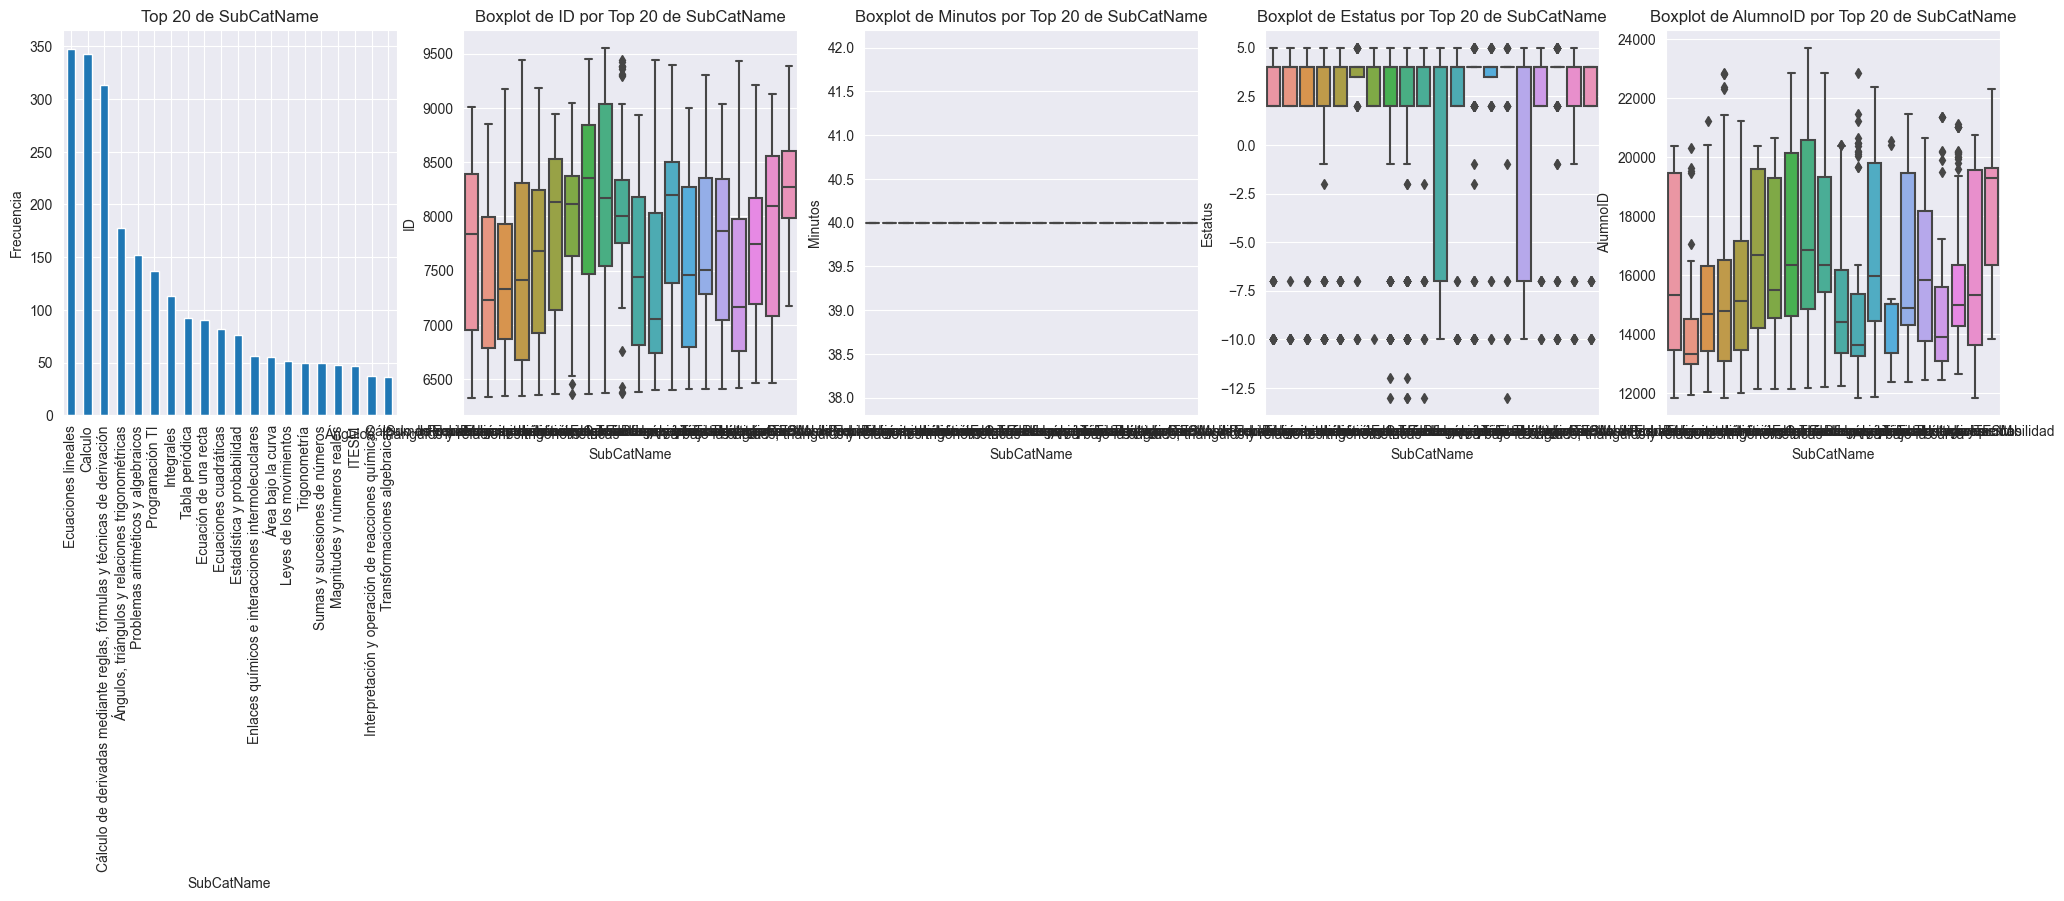

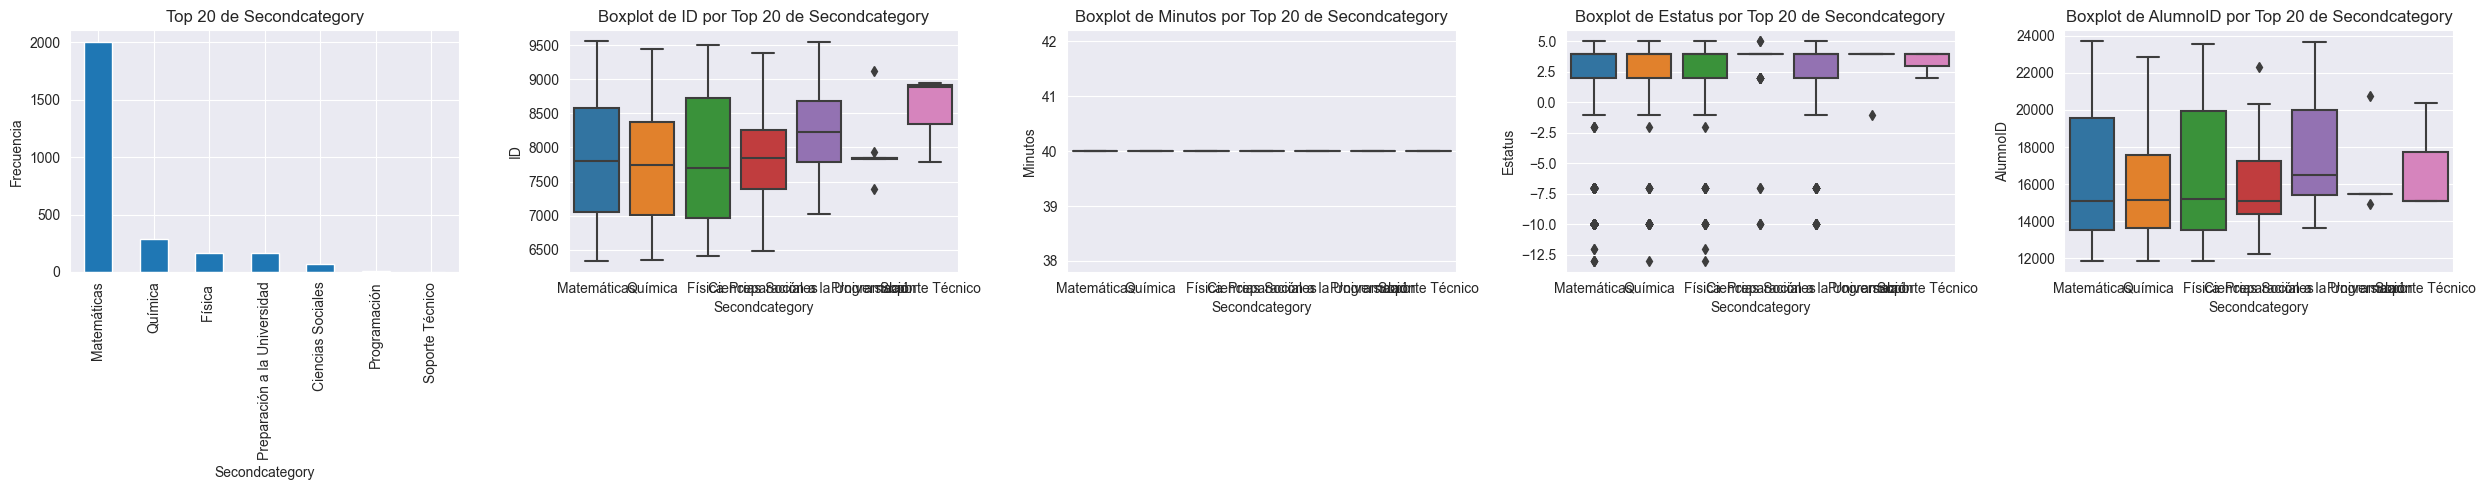

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\4220515450.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


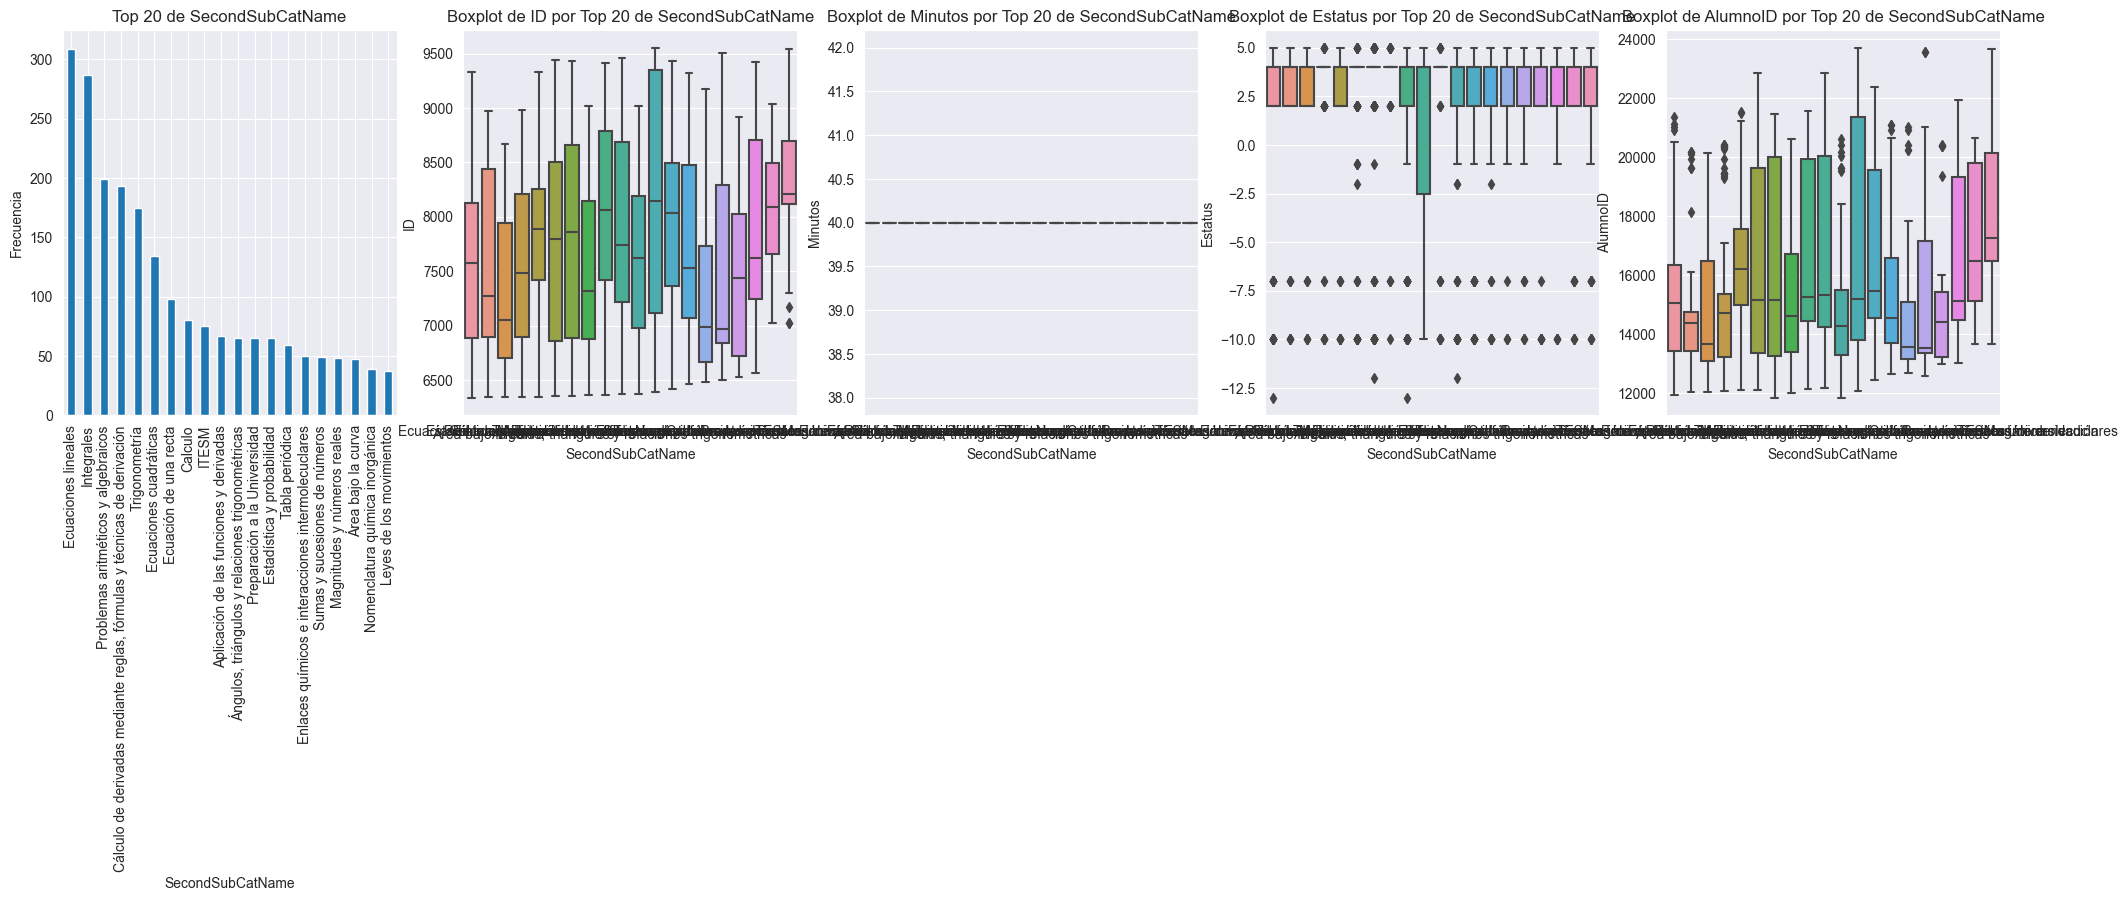

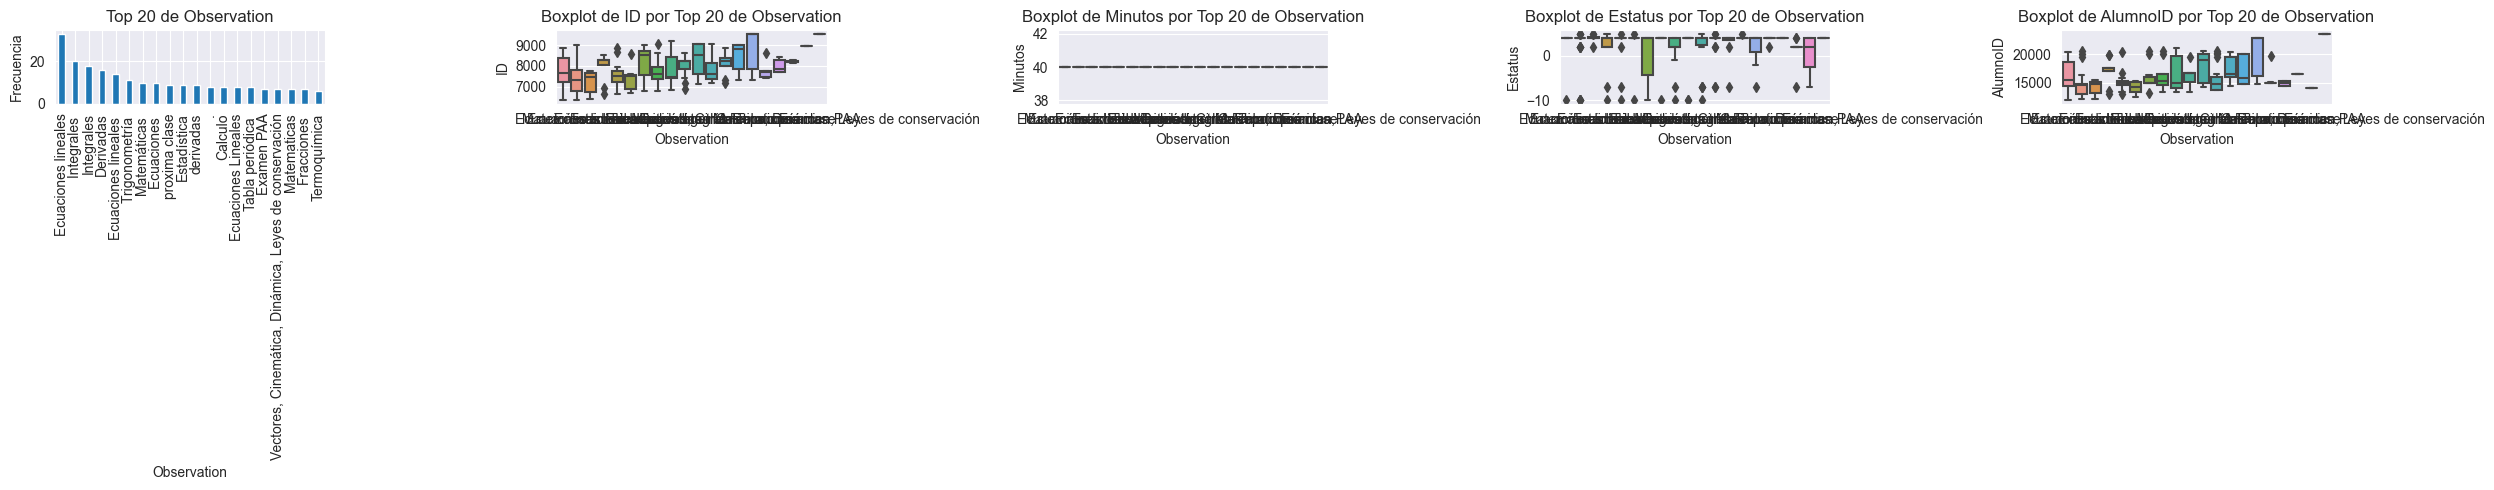

In [29]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosNumTutorias.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosNumTutorias[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosNumTutorias.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosNumTutorias[misdatosNumTutorias[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [30]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosNumTutorias.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valores únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)

EmailAlumno         1574
EmailTutor           731
Category               7
SubCatName            51
Secondcategory         7
SecondSubCatName      60
Observation         1790
dtype: int64


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

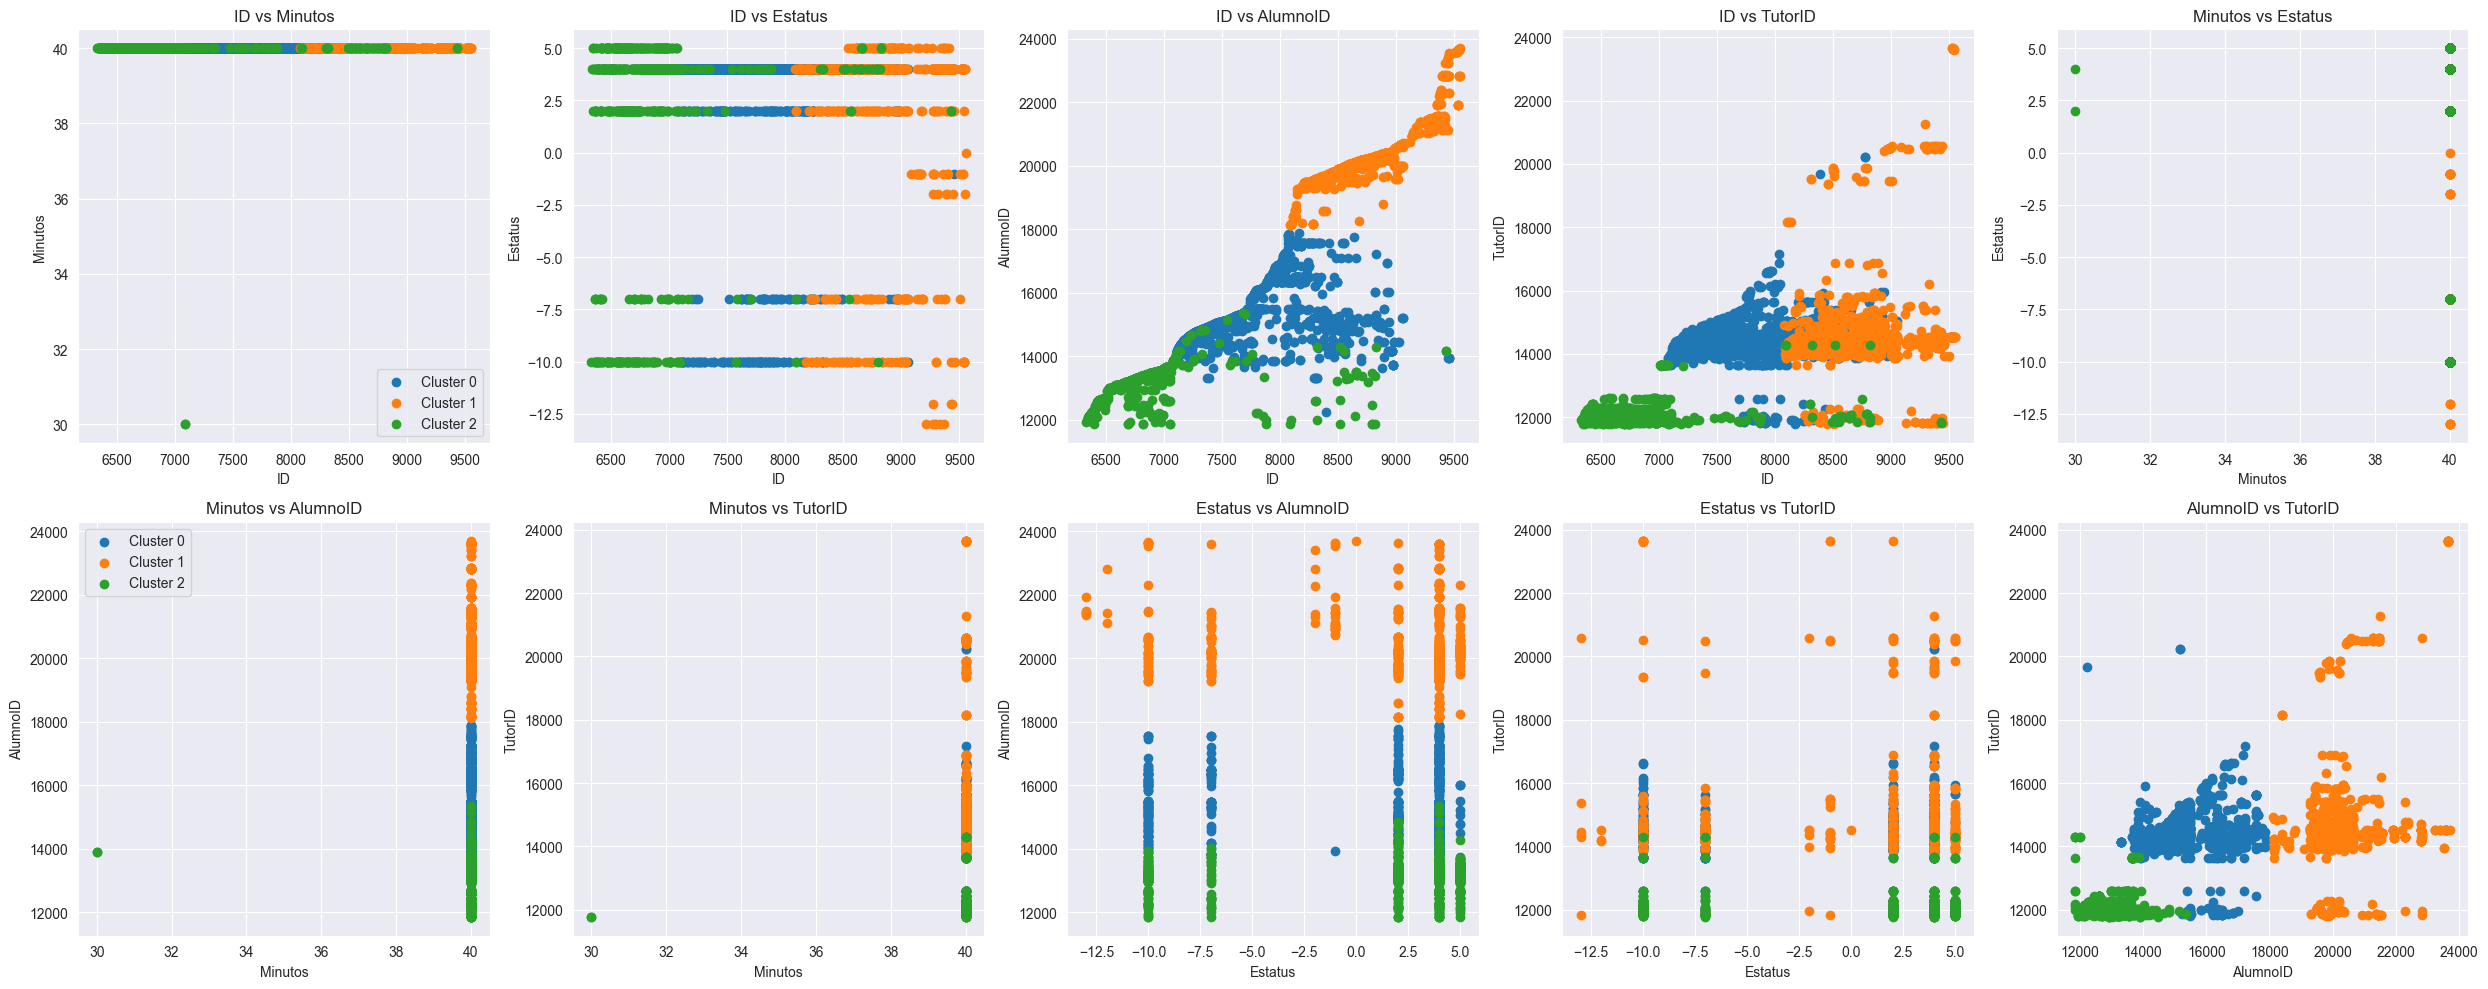

In [31]:
# Seleccionar columnas numéricas
columnas_numericas = misdatosNumTutorias.select_dtypes(include=['int64', 'float64']).columns

# Ejecutar K-Means
kmeans = KMeans(n_clusters=3)
misdatosNumTutorias['cluster'] = kmeans.fit_predict(misdatosNumTutorias[columnas_numericas])

# Combinaciones de todas las columnas numéricas
combinaciones = list(itertools.combinations(columnas_numericas, 2))

# Crear subplots
num_graficas = len(combinaciones)
num_filas = (num_graficas + 4) // 5  # Redondear hacia arriba
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

for i, (col1, col2) in enumerate(combinaciones):
    for cluster in range(3):  # Asumiendo 3 clusters
        cluster_data = misdatosNumTutorias[misdatosNumTutorias['cluster'] == cluster]
        axs[i].scatter(cluster_data[col1], cluster_data[col2], label=f'Cluster {cluster}')
    
    axs[i].set_title(f'{col1} vs {col2}')
    axs[i].set_xlabel(col1)
    axs[i].set_ylabel(col2)
    if i % 5 == 0:  # Añadir leyenda solo en la primera gráfica de cada fila para evitar la congestión
        axs[i].legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

¿Hay desequilibrio en las clases de la variable objetivo?

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\3676896588.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


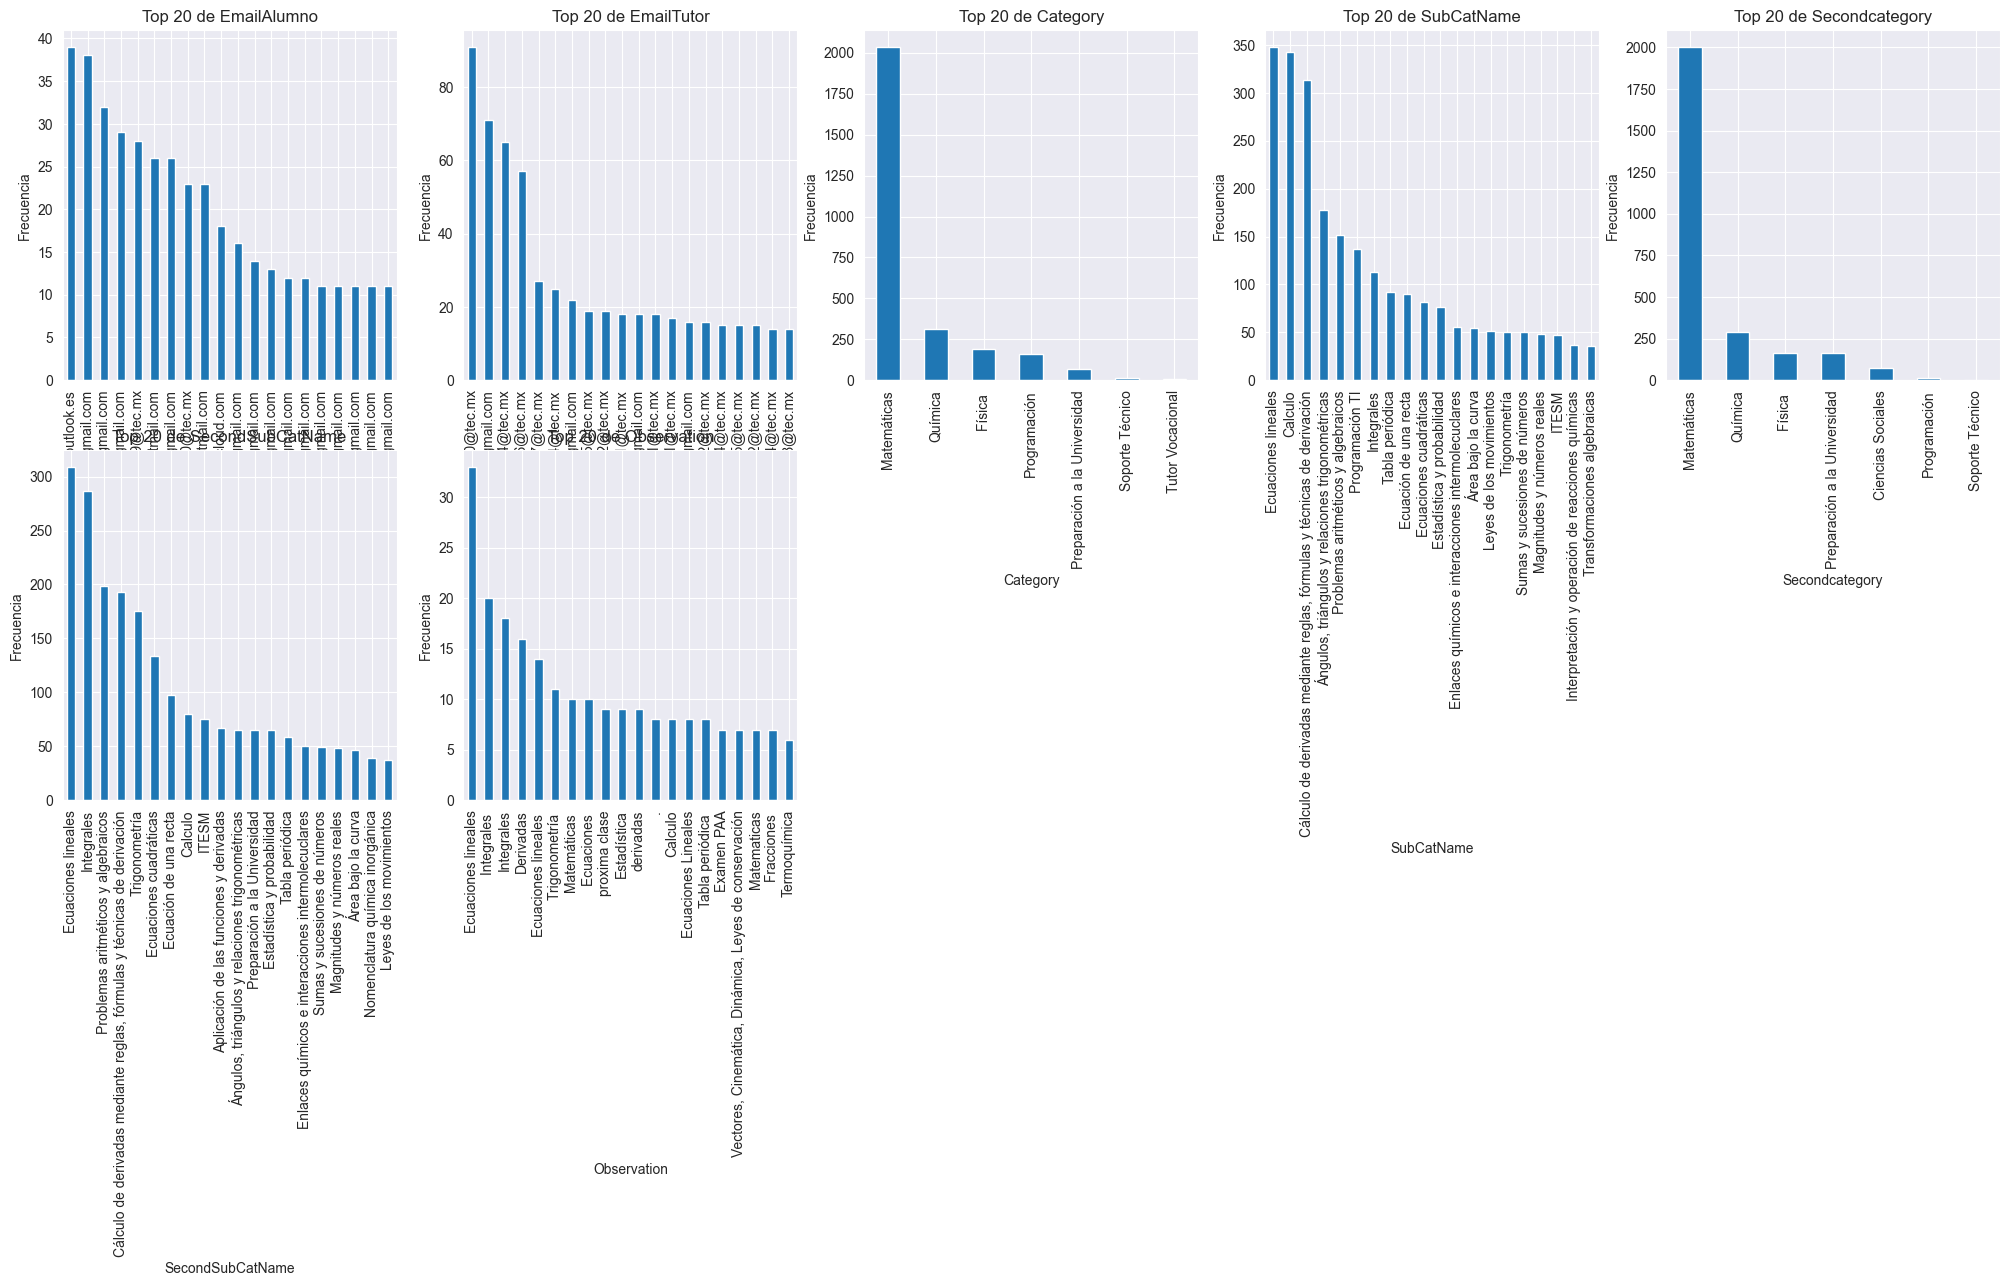

In [32]:
# Identificar columnas categóricas
columnas_categoricas = misdatosNumTutorias.select_dtypes(include=['object', 'category']).columns

# Crear subplots
num_columnas = len(columnas_categoricas)
num_filas = (num_columnas + 4) // 5  # Redondear hacia arriba para asegurar que todas las columnas se incluyan
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

# Iterar sobre las columnas categóricas y crear gráficos de barras para el top 20
for i, columna in enumerate(columnas_categoricas):
    top_20 = misdatosNumTutorias[columna].value_counts().head(20)
    top_20.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Top 20 de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

# Ocultar los ejes que no se usan (si los hay)
for i in range(len(columnas_categoricas), len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout y mostrar gráfico
plt.tight_layout()
plt.show()


# Tematicas brindadas

In [33]:
misdatosTematicasbrindadas = pd.read_excel("Temáticas brindadas por tutor 23JAN (1).xlsx")
misdatosTematicasbrindadas.describe()

OID     UserType
count   1294.000000  1294.000000
mean   14588.673107     1.143740
std     2226.410474     0.703139
min    11763.000000     1.000000
25%    12598.250000     1.000000
50%    14420.500000     1.000000
75%    15330.750000     1.000000
max    23676.000000     6.000000

In [34]:
misdatosTematicasbrindadas

OID                          Email           Name             Gender  \
0     11766           edgar.luna@kavak.com          Edgar             Hombre   
1     11776               vascencio@tec.mx            Vic                NaN   
2     11778  marcovillalobos92@hotmail.com  Marco Antonio                  H   
3     11784           lab.crearh@gmail.com         Carlos                NaN   
4     11786           frantostav@gmail.com     Francisco                 NaN   
...     ...                            ...            ...                ...   
1289  14335               A01369561@tec.mx     José Pablo             Hombre   
1290  23638         vanillajs293@gmail.com     javascript             Hombre   
1291  20672                j.zavala@tec.mx     Jacqueline  Prefiero no decir   
1292  14356               A00834601@tec.mx        Corina               Mujer   
1293  15248               a01662781@tec.mx          Jorge             Hombre   

                Campus         Category  \
0            Monterrey              NaN   
1                  NaN              NaN   
2            Monterrey              NaN   
3                  NaN              NaN   
4                  NaN              NaN   
...                ...              ...   
1289          Santa Fe      Matemáticas   
1290          Irapuato  Soporte Técnico   
1291  Estado de México     Programación   
1292         Monterrey      Matemáticas   
1293  Ciudad de México      Matemáticas   

                                            subcategory  UserType  \
0                                                   NaN         2   
1                                                   NaN         1   
2                                                   NaN         2   
3                                                   NaN         1   
4                                                   NaN         1   
...                                                 ...       ...   
1289  Cálculo de derivadas mediante reglas, fórmulas...         1   
1290                                           SoyTutor         6   
1291                                             Python         1   
1292                                         Integrales         1   
1293                         Estadística y probabilidad         1   

         SecondCategory  SecondSubcategory  
0                   NaN                NaN  
1                   NaN                NaN  
2                   NaN                NaN  
3                   NaN                NaN  
4                   NaN                NaN  
...                 ...                ...  
1289  Ciencias Sociales  Ciencias Sociales  
1290       Programación         JavaScript  
1291       Programación              C/C++  
1292       Programación              C/C++  
1293       Programación                  R  

[1294 rows x 10 columns]

In [35]:
print(misdatosTematicasbrindadas.dtypes)

print(misdatosTematicasbrindadas.nunique())

OID                   int64
Email                object
Name                 object
Gender               object
Campus               object
Category             object
subcategory          object
UserType              int64
SecondCategory       object
SecondSubcategory    object
dtype: object
OID                  1294
Email                1292
Name                  808
Gender                  5
Campus                 26
Category                7
subcategory            54
UserType                3
SecondCategory          7
SecondSubcategory      61
dtype: int64


In [36]:
# Contar NaN y 0
nan_count = misdatosTematicasbrindadas.isna().sum()
zero_count = misdatosTematicasbrindadas.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 OID                    0
Email                  0
Name                   0
Gender               246
Campus               242
Category             261
subcategory          261
UserType               0
SecondCategory       323
SecondSubcategory    323
dtype: int64

Conteo de 0 por columna:
 OID                  0
Email                0
Name                 0
Gender               0
Campus               0
Category             0
subcategory          0
UserType             0
SecondCategory       0
SecondSubcategory    0
dtype: int64

Total de NaN en el DataFrame: 1656
Total de 0 en el DataFrame: 0


C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\3761710346.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


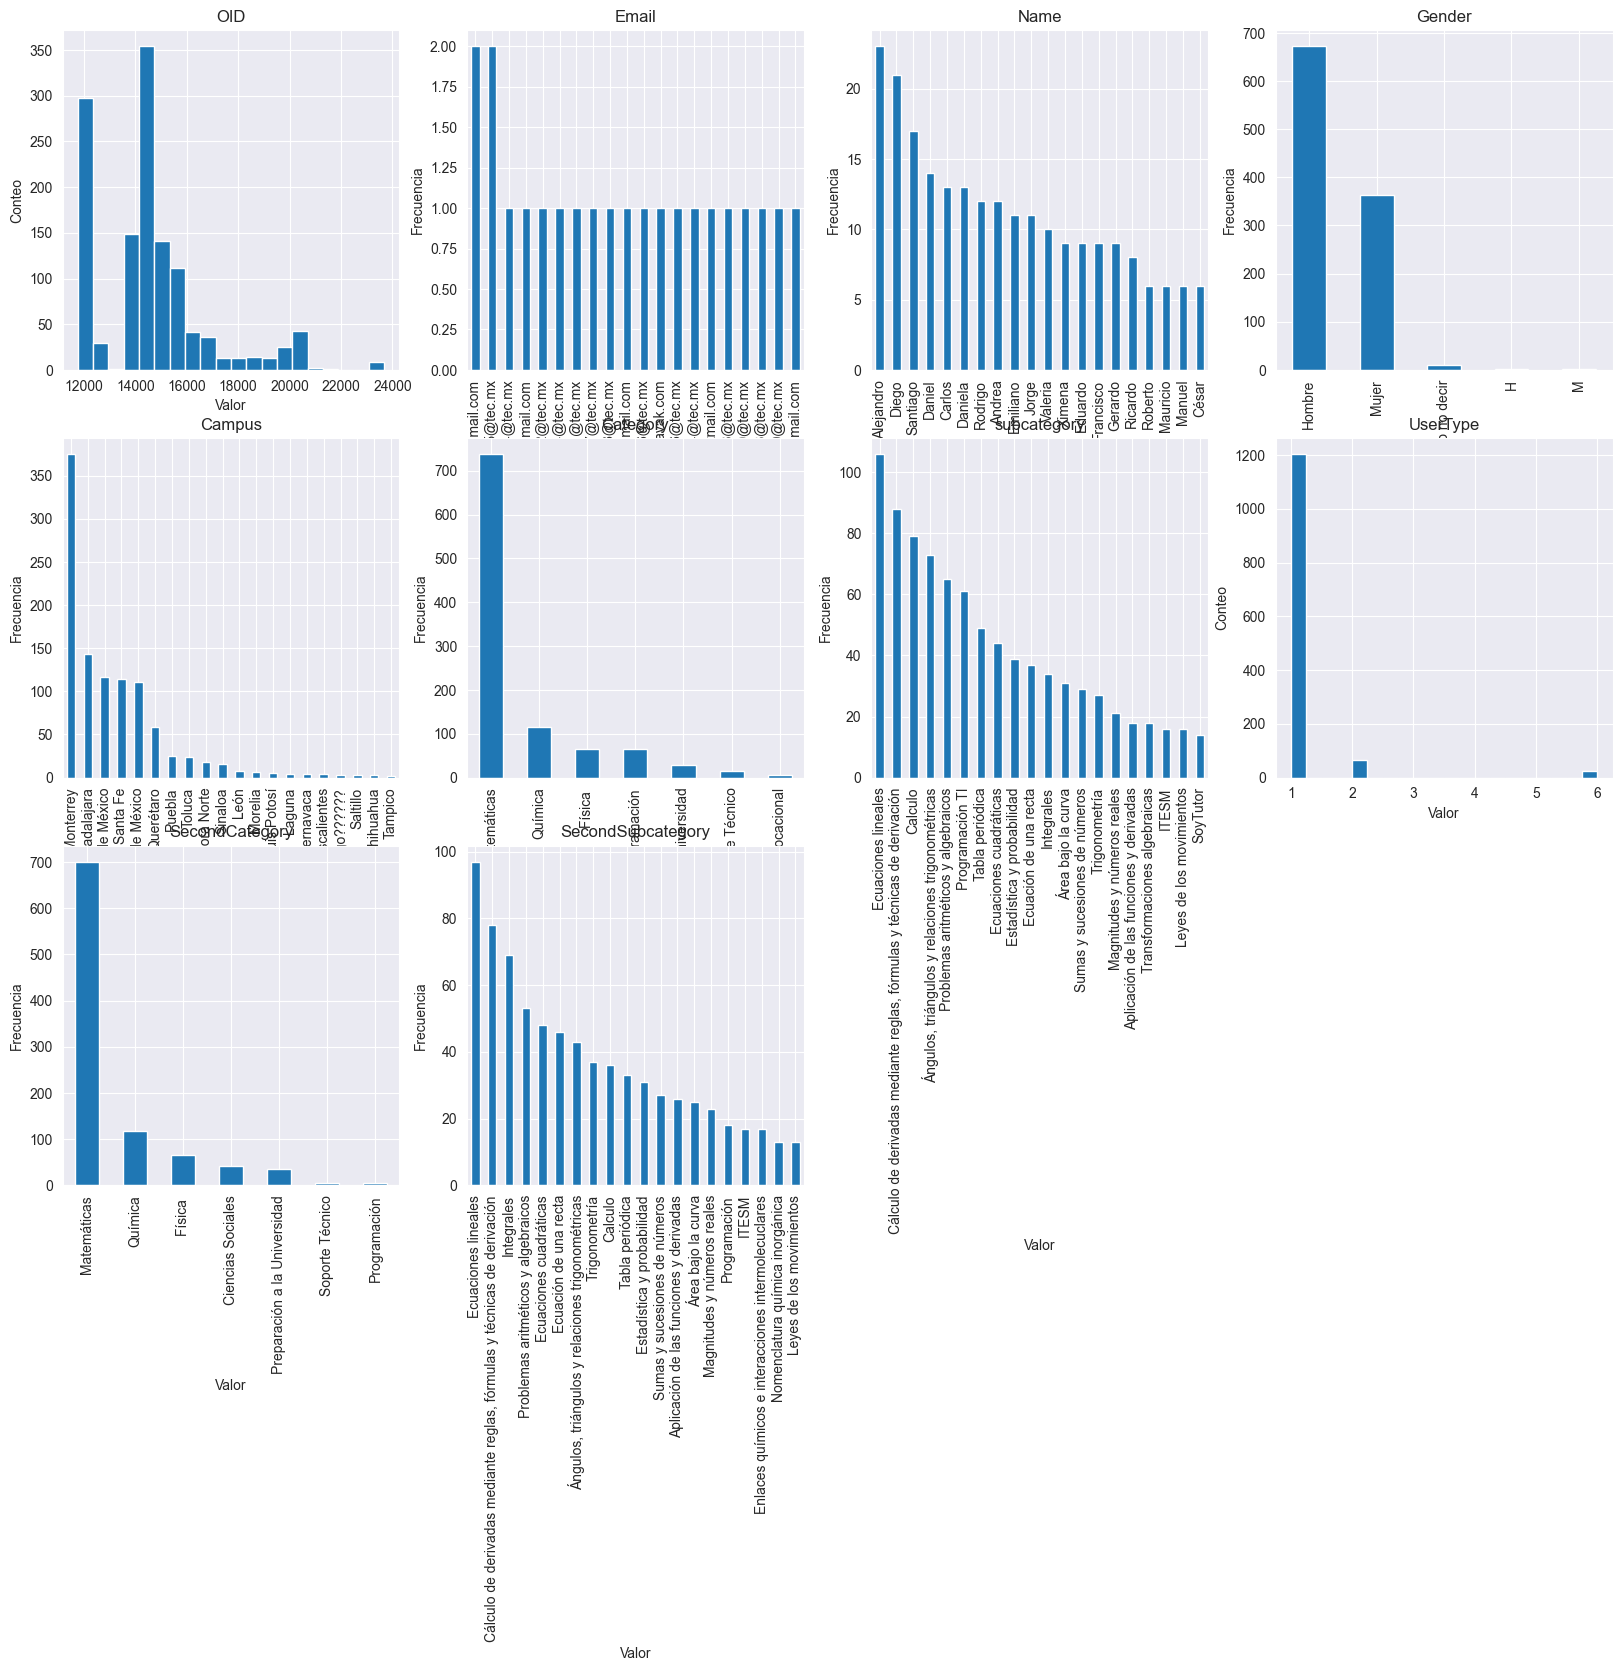

In [37]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosTematicasbrindadas.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosTematicasbrindadas.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosTematicasbrindadas[columna].dtype == 'object' or misdatosTematicasbrindadas[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosTematicasbrindadas[columna].dtype == 'object' or misdatosTematicasbrindadas[columna].dtype.name == 'category':
            conteo_categorias = misdatosTematicasbrindadas[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosTematicasbrindadas[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()
plt.show()

-  ¿Hay correlación entre las variables dependientes e independientes?

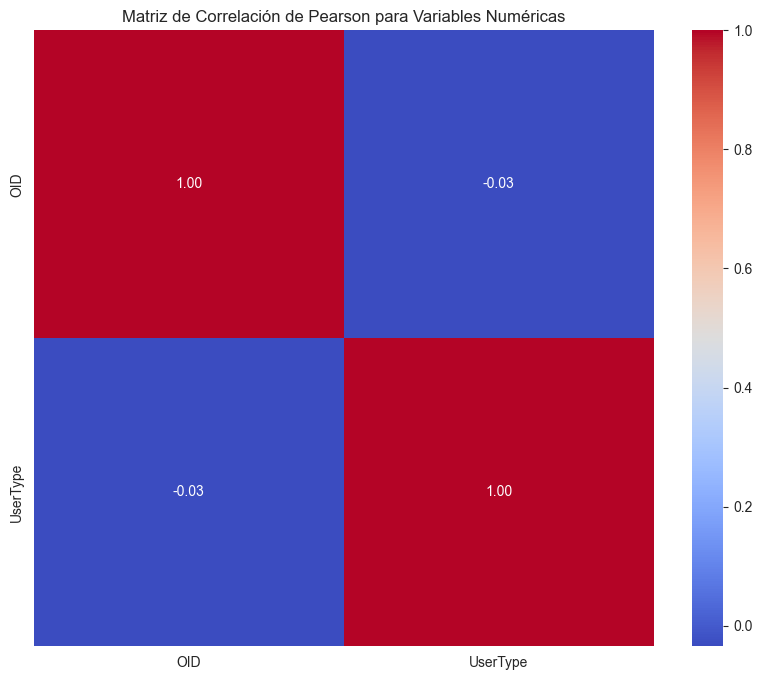

In [38]:
# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosTematicasbrindadas.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()

¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

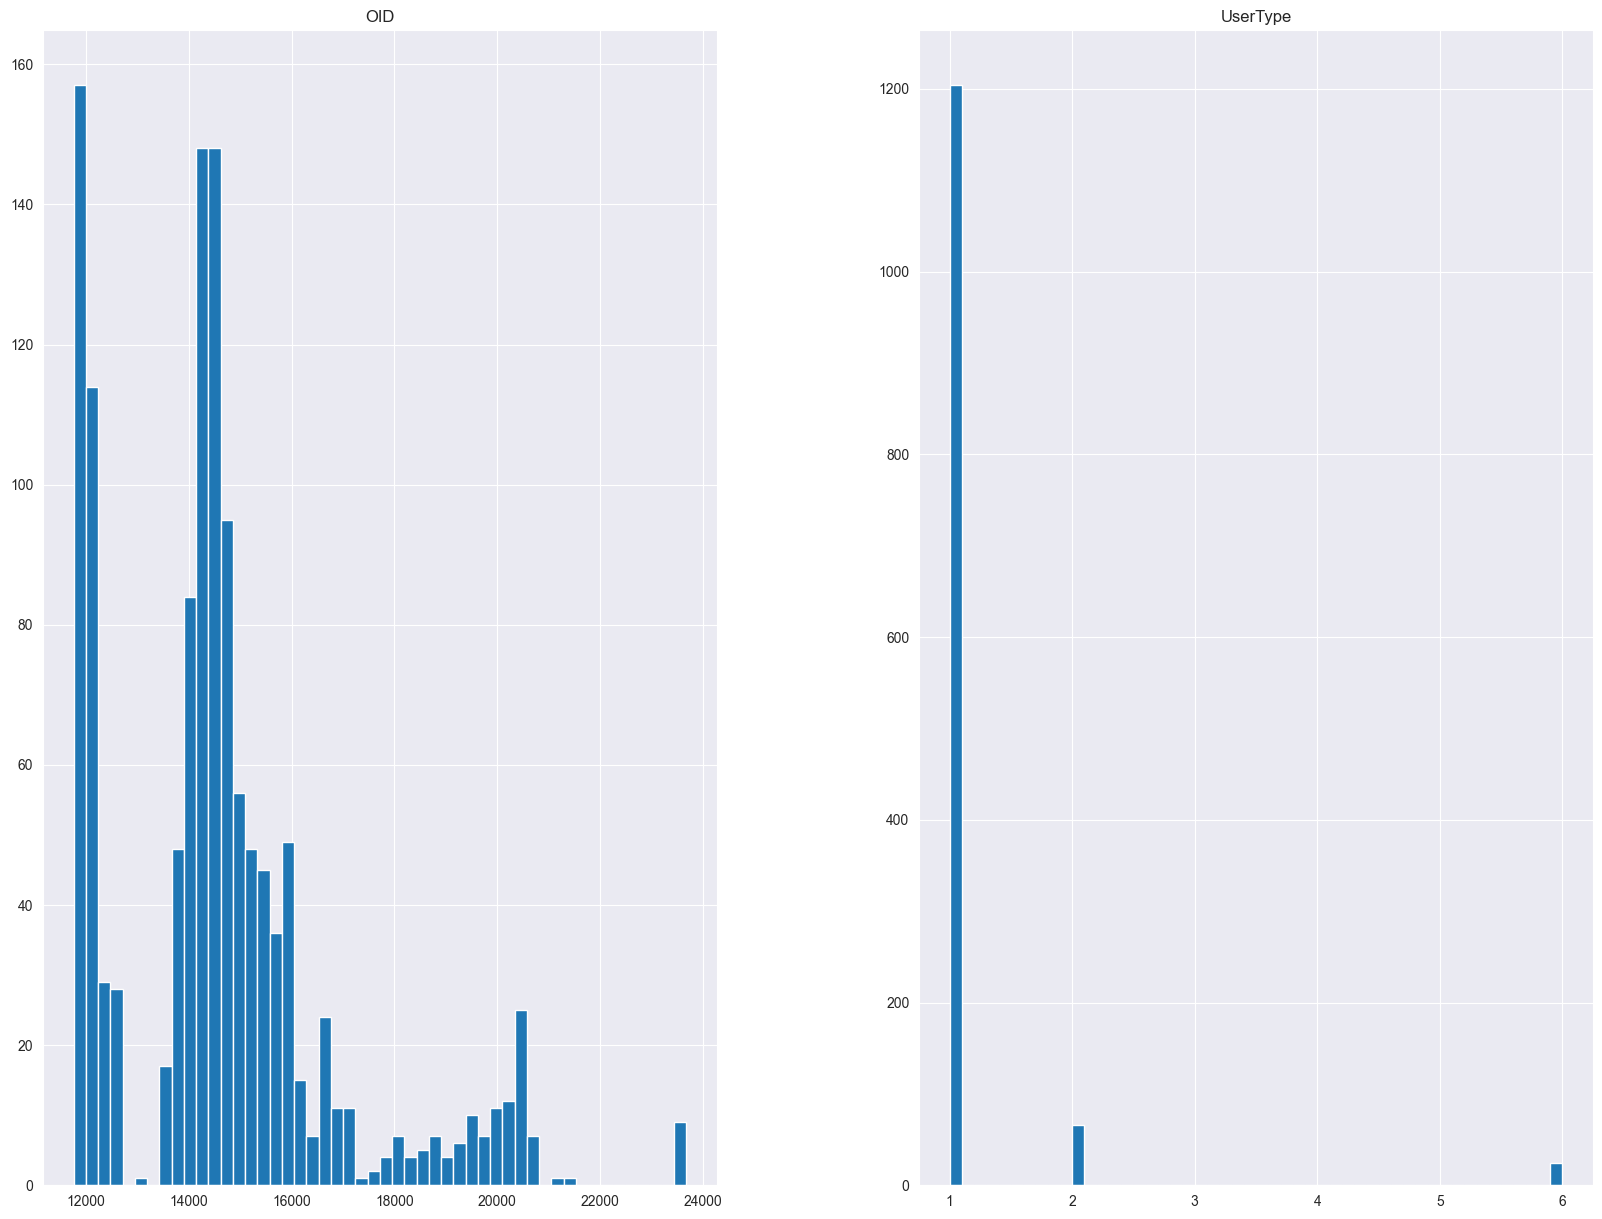

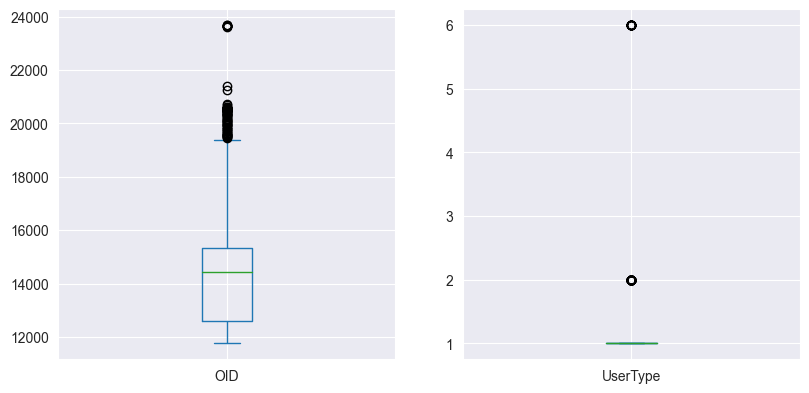

In [39]:
misdatosTematicasbrindadas.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosTematicasbrindadas.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()

- ¿Cómo se distribuyen los datos en función de diferentes categorías?

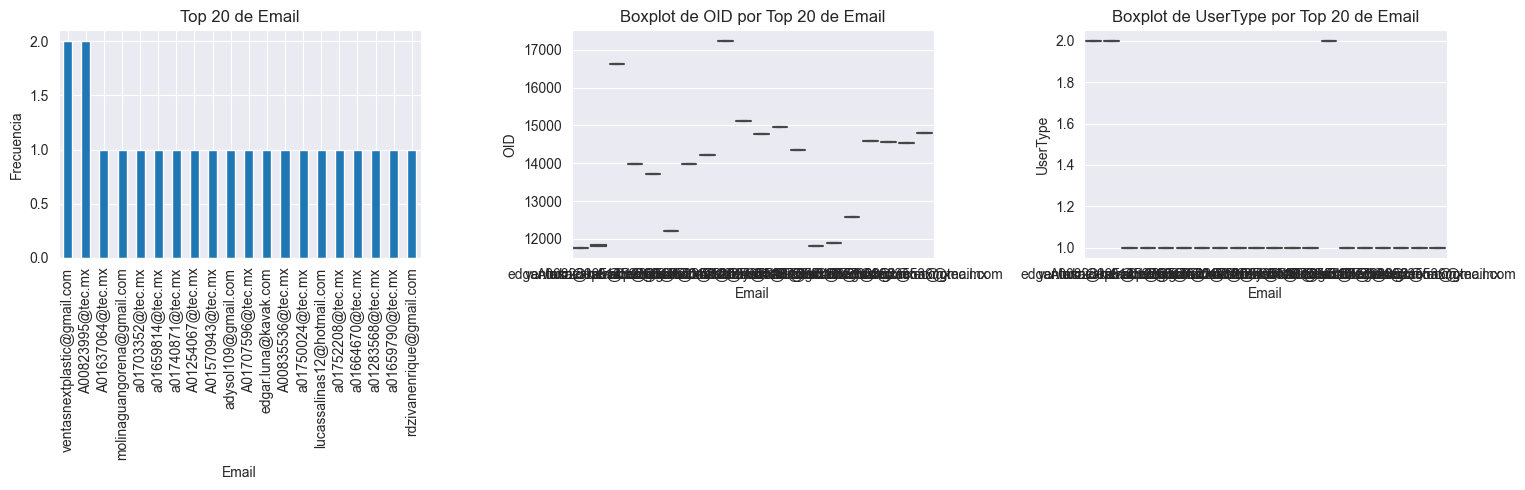

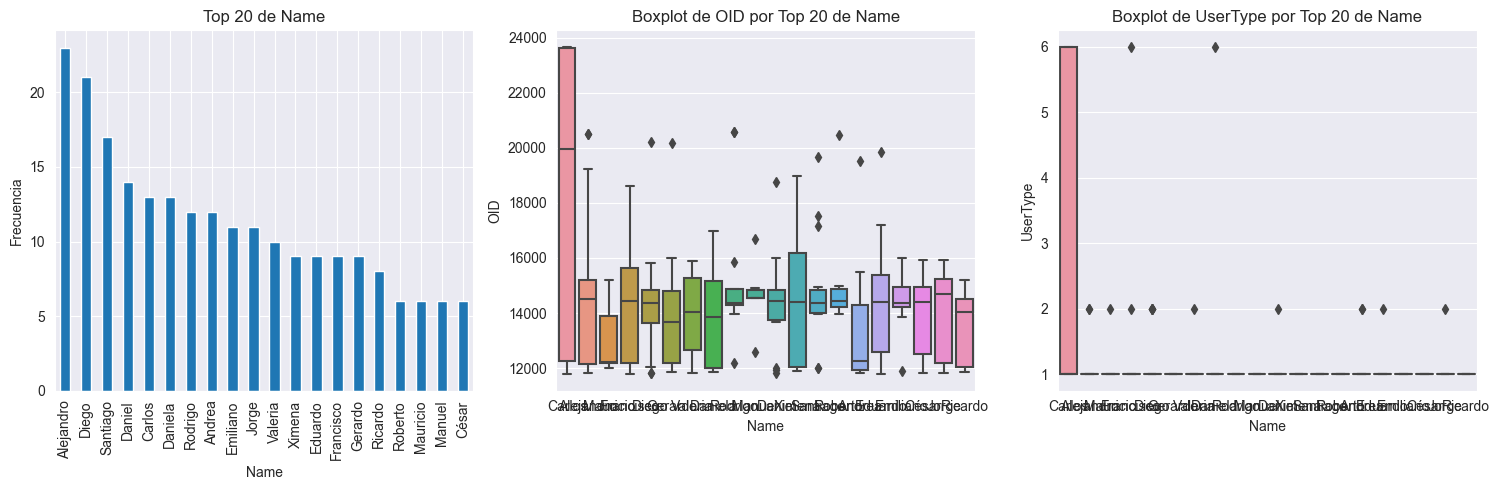

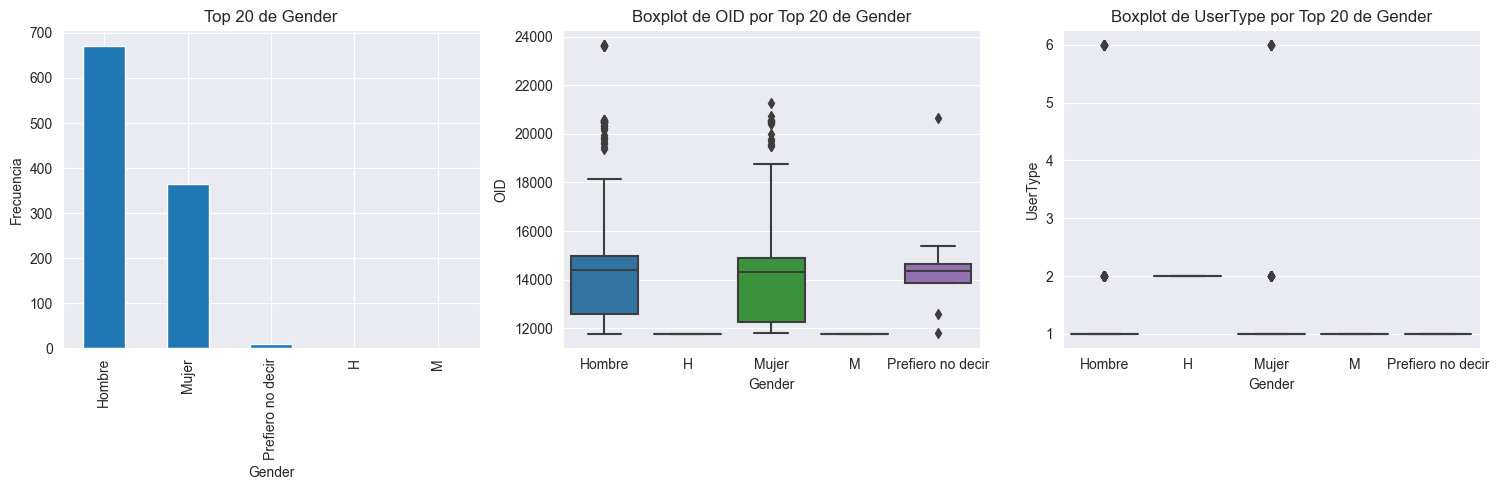

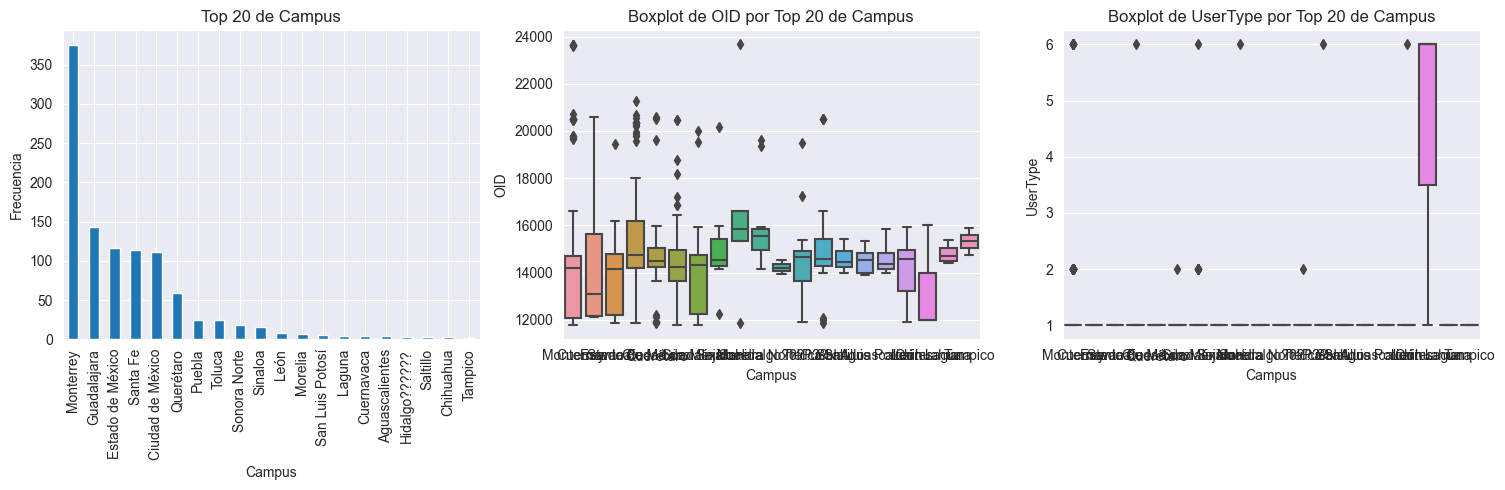

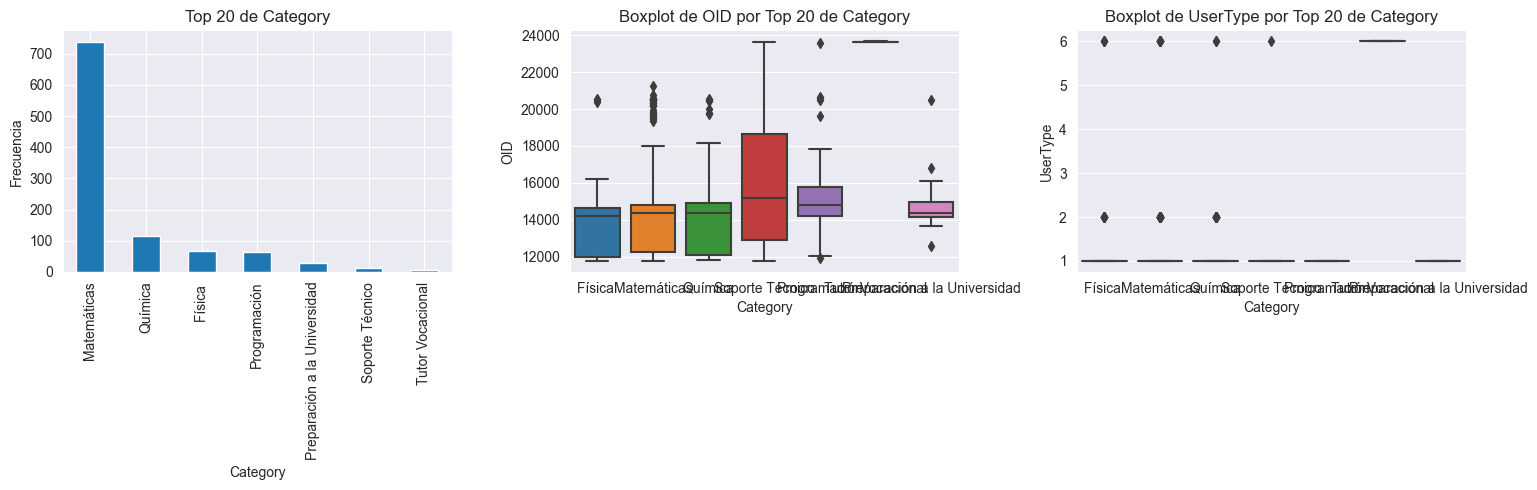

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\1057498220.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


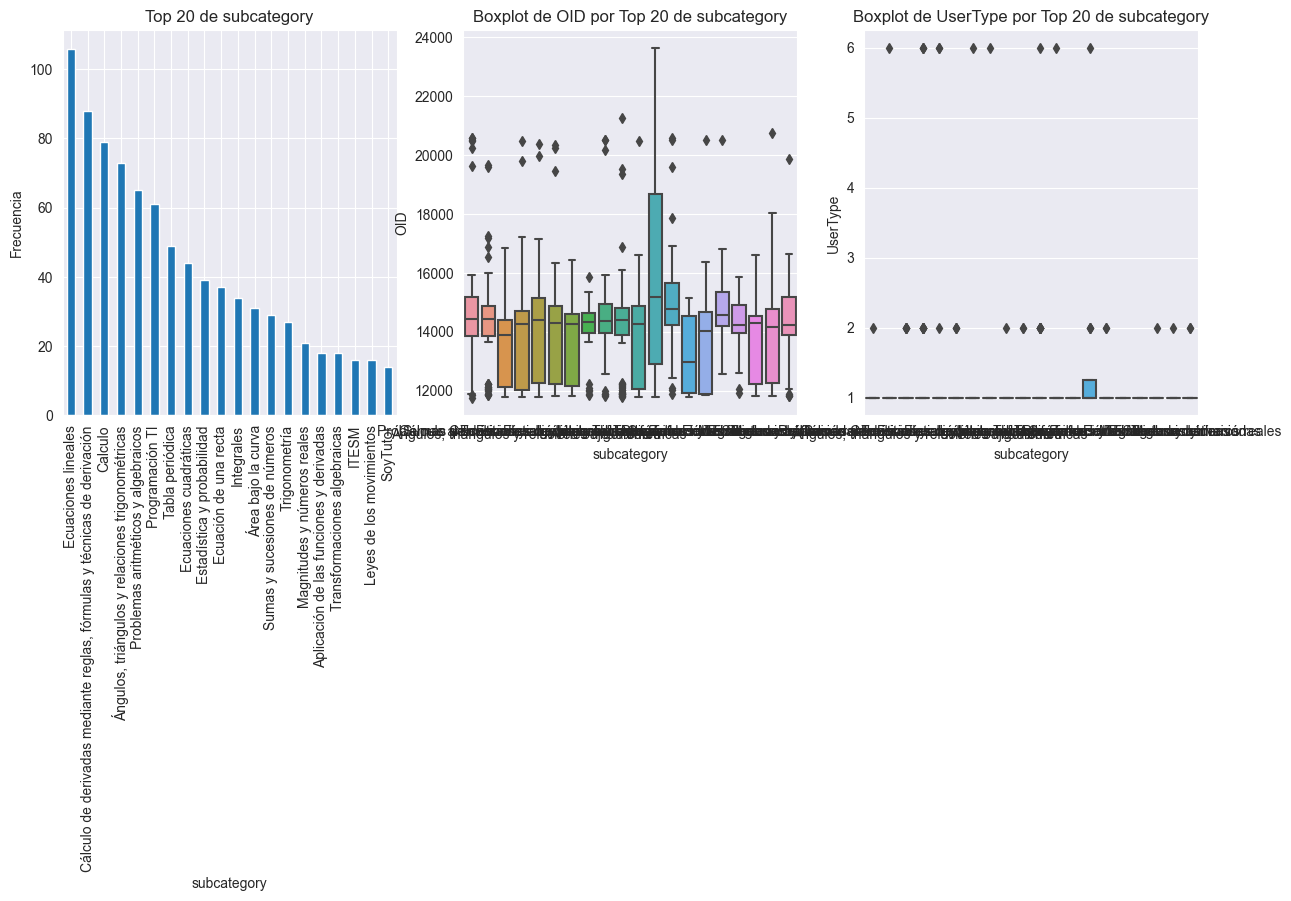

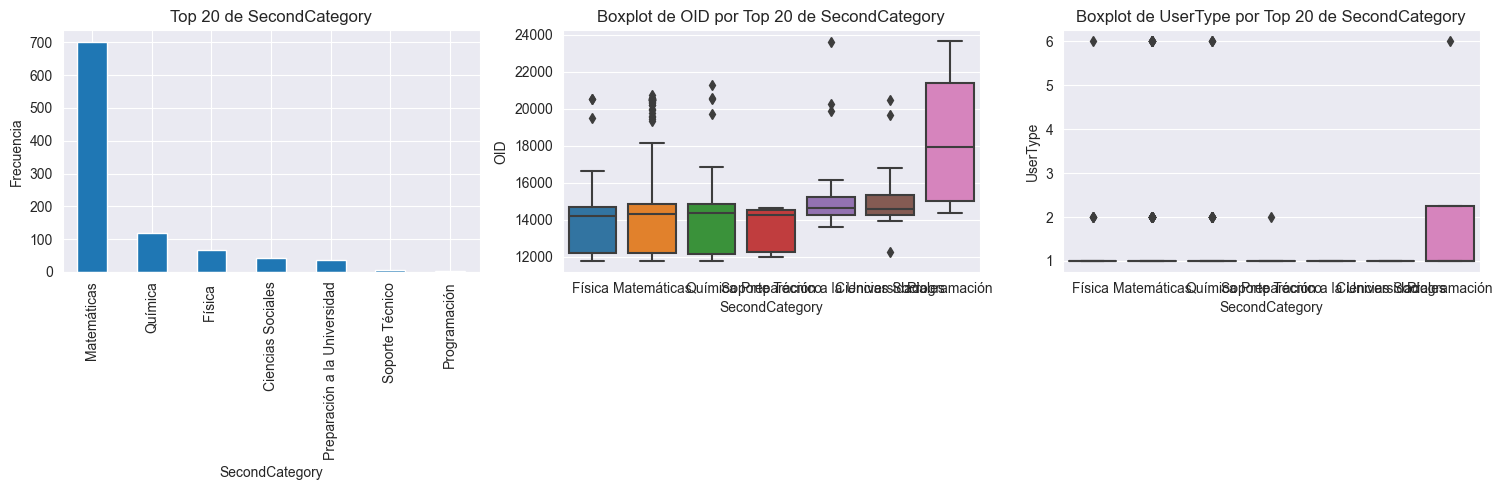

C:\Users\oviwa\AppData\Local\Temp\ipykernel_46464\1057498220.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


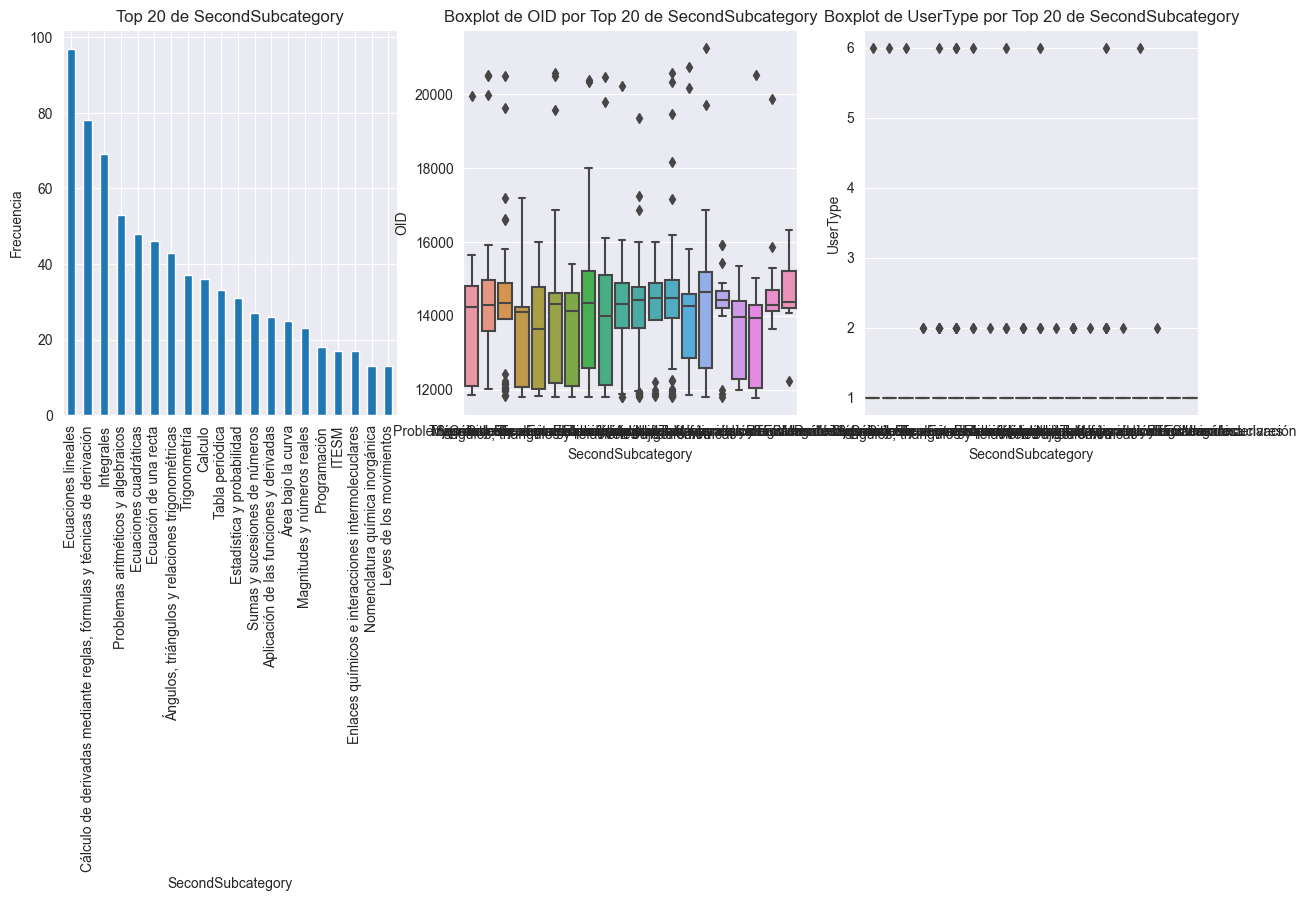

In [40]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosTematicasbrindadas.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosTematicasbrindadas[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosTematicasbrindadas.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosTematicasbrindadas[misdatosTematicasbrindadas[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [41]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosTematicasbrindadas.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valores únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)


Email                1292
Name                  808
Gender                  5
Campus                 26
Category                7
subcategory            54
SecondCategory          7
SecondSubcategory      61
dtype: int64


# DS Vacantes Data Scientist

In [51]:
misdatosVacDSs = pd.read_csv(r"Vacantes Laborales/data_scientists.csv")
misdatosVacDSs.describe()

Unnamed: 0
count  169.000000
mean    84.000000
std     48.930222
min      0.000000
25%     42.000000
50%     84.000000
75%    126.000000
max    168.000000

In [ ]:
print(misdatosVacDSs.dtypes)
print("------------------------------------------------------------\n")
print(misdatosVacDSs.nunique())
print("------------------------------------------------------------\n")
# Contar NaN y 0
nan_count = misdatosVacDSs.isna().sum()
zero_count = misdatosVacDSs.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

# DS Vacantes Industrial Enginers

In [44]:
misdatosVacIE = pd.read_csv(r"Vacantes Laborales/industrial_engineers.csv")
misdatosVacIE.describe()

Unnamed: 0
count   59.000000
mean    29.000000
std     17.175564
min      0.000000
25%     14.500000
50%     29.000000
75%     43.500000
max     58.000000

In [45]:
misdatosVacIE

Unnamed: 0                                          jobtitle  \
0            0                               Industrial Engineer   
1            1                               Industrial Engineer   
2            2                   Industrial Engineer Established   
3            3  Has immediate opening for an Industrial Engineer   
4            4                              INDUSTRIAL ENGINEERS   
5            5                           PTD Industrial Engineer   
6            6                               Industrial Engineer   
7            7                               Industrial Engineer   
8            8                               Industrial Engineer   
9            9                               INDUSTRIAL ENGINEER   
10          10                               Industrial Engineer   
11          11                        senior industrial engineer   
12          12                               industrial engineer   
13          13                               industrial engineer   
14          14                               Industrial Engineer   
15          15                               Industrial Engineer   
16          16                               Industrial Engineer   
17          17                               Industrial Engineer   
18          18                          Lean Industrial Engineer   
19          19                   Entry Level Industrial Engineer   
20          20                              industrial engineers   
21          21                               Industrial Engineer   
22          22  Industrial Engineering Technology Faculty Member   
23          23                               Industrial Engineer   
24          24                               Industrial Engineer   
25          25                               Industrial Engineer   
26          26                               Industrial Engineer   
27          27                               Industrial Engineer   
28          28                               Industrial Engineer   
29          29                               Industrial Engineer   
30          30                               Industrial Engineer   
31          31                               Industrial Engineer   
32          32                               Industrial Engineer   
33          33                 Industrial Engineer #Lam343-IE-CA   
34          34                       Industrial Engineer #JOI002   
35          35                       Industrial Engineer #SID002   
36          36                         Industrial Engineer #IE17   
37          37                               Industrial Engineer   
38          38                       Industrial Engineer--Energy   
39          39          Distribution Center Industrial Engineers   
40          40                               Industrial Engineer   
41          41               Manufacturing / Industrial Engineer   
42          42                               industrial engineer   
43          43         Manufacturing Systems Industrial Engineer   
44          44                               industrial engineer   
45          45                               Industrial Engineer   
46          46                               Industrial Engineer   
47          47                        Senior Industrial Engineer   
48          48                               Industrial Engineer   
49          49                               Industrial Engineer   
50          50                               Industrial Engineer   
51          51                               INDUSTRIAL ENGINEER   
52          52                        Senior Industrial Engineer   
53          53                               Industrial Engineer   
54          54                               Industrial Engineer   
55          55                      Industrial Engineering Staff   
56          56                 Industrial Engineering Technician   
57          57                               Industrial Engi

In [46]:
print(misdatosVacIE.dtypes)
print("------------------------------------------------------------\n")
print(misdatosVacIE.nunique())
print("------------------------------------------------------------\n")
# Contar NaN y 0
nan_count = misdatosVacIE.isna().sum()
zero_count = misdatosVacIE.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Unnamed: 0         int64
jobtitle          object
jobdescription    object
experience        object
dtype: object
------------------------------------------------------------

Unnamed: 0        59
jobtitle          24
jobdescription    59
experience         2
dtype: int64
------------------------------------------------------------

Conteo de NaN por columna:
 Unnamed: 0        0
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Conteo de 0 por columna:
 Unnamed: 0        1
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 1


In [47]:
misdatosVacIE

Unnamed: 0                                          jobtitle  \
0            0                               Industrial Engineer   
1            1                               Industrial Engineer   
2            2                   Industrial Engineer Established   
3            3  Has immediate opening for an Industrial Engineer   
4            4                              INDUSTRIAL ENGINEERS   
5            5                           PTD Industrial Engineer   
6            6                               Industrial Engineer   
7            7                               Industrial Engineer   
8            8                               Industrial Engineer   
9            9                               INDUSTRIAL ENGINEER   
10          10                               Industrial Engineer   
11          11                        senior industrial engineer   
12          12                               industrial engineer   
13          13                               industrial engineer   
14          14                               Industrial Engineer   
15          15                               Industrial Engineer   
16          16                               Industrial Engineer   
17          17                               Industrial Engineer   
18          18                          Lean Industrial Engineer   
19          19                   Entry Level Industrial Engineer   
20          20                              industrial engineers   
21          21                               Industrial Engineer   
22          22  Industrial Engineering Technology Faculty Member   
23          23                               Industrial Engineer   
24          24                               Industrial Engineer   
25          25                               Industrial Engineer   
26          26                               Industrial Engineer   
27          27                               Industrial Engineer   
28          28                               Industrial Engineer   
29          29                               Industrial Engineer   
30          30                               Industrial Engineer   
31          31                               Industrial Engineer   
32          32                               Industrial Engineer   
33          33                 Industrial Engineer #Lam343-IE-CA   
34          34                       Industrial Engineer #JOI002   
35          35                       Industrial Engineer #SID002   
36          36                         Industrial Engineer #IE17   
37          37                               Industrial Engineer   
38          38                       Industrial Engineer--Energy   
39          39          Distribution Center Industrial Engineers   
40          40                               Industrial Engineer   
41          41               Manufacturing / Industrial Engineer   
42          42                               industrial engineer   
43          43         Manufacturing Systems Industrial Engineer   
44          44                               industrial engineer   
45          45                               Industrial Engineer   
46          46                               Industrial Engineer   
47          47                        Senior Industrial Engineer   
48          48                               Industrial Engineer   
49          49                               Industrial Engineer   
50          50                               Industrial Engineer   
51          51                               INDUSTRIAL ENGINEER   
52          52                        Senior Industrial Engineer   
53          53                               Industrial Engineer   
54          54                               Industrial Engineer   
55          55                      Industrial Engineering Staff   
56          56                 Industrial Engineering Technician   
57          57                               Industrial Engi

# DS Vacantes Software Engineers

In [48]:
misdatosVacSE = pd.read_csv(r"Vacantes Laborales/software_engineers.csv")
misdatosVacSE.describe()

Unnamed: 0
count  2375.000000
mean   1187.000000
std     685.747767
min       0.000000
25%     593.500000
50%    1187.000000
75%    1780.500000
max    2374.000000

In [49]:
misdatosVacSE

Unnamed: 0                                           jobtitle  \
0              0                   Software Engineer (Nhr-14/24/74)   
1              1                                 Software Engineers   
2              2                                  Software Engineer   
3              3                                  Software Engineer   
4              4                            Software Engineer Staff   
...          ...                                                ...   
2370        2370                 Senior Software Engineer/Developer   
2371        2371                                Software Developers   
2372        2372                                  Software Engineer   
2373        2373  SOFTWARE ENGINEER, UNLV Department of Geoscien...   
2374        2374                    Software Engineer (L3) #19-6636   

                                         jobdescription  \
0     <p>In support of NAVAIRâ€™s Simulation Divisio...   
1     <p><strong>JOBS in our Ypsilanti, MI location ...   
2     ENGINEERING-Leeyo Software, Inc. is recruiting...   
3     ENGIINEERING \n\tJuniper Networks is recruitin...   
4     ENGIINEERING \n\tJuniper Networks is recruitin...   
...                                                 ...   
2370  <p><strong>Senior Software Engineer/Developer&...   
2371  <p>Pinnacle Tek, LLC is seeking&nbsp;<strong>S...   
2372  <p>Lowe&rsquo;s seeks a Software Engineer. (Po...   
2373  <p>The University of Nevada, Las Vegas invites...   
2374  <p>Twilio, Inc. seeks Software Engineer (L3) i...   

                   experience  
0               No experience  
1               No experience  
2               No experience  
3               No experience  
4               No experience  
...                       ...  
2370  1-3 years of experience  
2371  1-3 years of experience  
2372  1-3 years of experience  
2373  1-3 years of experience  
2374  1-3 years of experience  

[2375 rows x 4 columns]

In [50]:
print(misdatosVacSE.dtypes)
print("------------------------------------------------------------\n")
print(misdatosVacSE.nunique())
print("------------------------------------------------------------\n")
# Contar NaN y 0
nan_count = misdatosVacSE.isna().sum()
zero_count = misdatosVacSE.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Unnamed: 0         int64
jobtitle          object
jobdescription    object
experience        object
dtype: object
------------------------------------------------------------

Unnamed: 0        2375
jobtitle           835
jobdescription    2369
experience           2
dtype: int64
------------------------------------------------------------

Conteo de NaN por columna:
 Unnamed: 0        0
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Conteo de 0 por columna:
 Unnamed: 0        1
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 1
